In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose

from src.plot import plot_single_bath, plot_all_params, save_individual_run, save_bath 
from src.load_data import load_sheet, clean_sheet_with_label
from src.fft import plot_conductivity_fft, plot_voltage_fft, plot_pH_fft, plot_temperature_fft

%load_ext autoreload
%matplotlib
%autoreload 2

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
import os

print(os.getcwd())

c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics


In [3]:
internal_df, sheet1 = load_sheet("Electroplate Experiments Data JUN_JUL", "vary_internal_table")
internal_df = clean_sheet_with_label(internal_df)
# two_side_plate, sheet2 = load_sheet("Electroplate Experiments Data JUN_JUL", "2 side Experimental Result")
# two_side_plate = clean_sheet_with_label(two_side_plate)
august_df, sheet3 = load_sheet("Electroplating Experiments Data August", "Sheet1")
august_df = clean_sheet_with_label(august_df)
september_df, sheet4 = load_sheet("Electroplating Experiments Data Sep-Oct", "Sheet1")
september_df =clean_sheet_with_label(september_df)

internal_df[internal_df['bath_id']=='Bath_3']
combined_df = pd.concat([internal_df, august_df, september_df])
combined_df['run_id'].unique()

array(['JUL_3_1', 'JUL_3_2', 'JUL_3_3', 'JUL_3_4', 'JUL_7_1', 'JUL_7_2',
       'JUL_7_3', 'JUL_7_4', 'JUL_8_1', 'JUL_8_2', 'JUL_8_3', 'JUL_8_4',
       'JUL_9_1', 'JUL_9_2', 'JUL_16_1', 'JUL_16_2', 'JUL_16_3',
       'JUL_16_4', 'JUL_16_5', 'JUL_16_6', 'JUL_17_1', 'JUL_17_2',
       'JUL_17_3', 'JUL_17_4', 'JUL_17_5', 'JUL_17_6', 'JUL_17_7',
       'JUL_21_1', 'JUL_21_2', 'JUL_21_3', 'JUL_21_4', 'JUL_22_1',
       'JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6',
       'JUL_22_7', 'JUL_22_8', 'JUL_22_9', 'JUL_23_1', 'JUL_23_2',
       'JUL_23_3', 'JUL_23_4', 'JUL_23_5', 'JUL_24_1', 'JUL_24_2',
       'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7',
       'JUL_24_8', 'JUL_24_9', 'JUL_24_10', 'JUL_31_1', 'JUL_31_2',
       'JUL_31_3', 'JUL_31_4', 'JUL_31_5', 'JUL_31_6', 'AUG_6_1',
       'AUG_6_2', 'AUG_7_1', 'AUG_7_2', 'AUG_7_3', 'AUG_7_4', 'AUG_7_5',
       'AUG_7_6', 'SEPT_24_1', 'SEPT_24_2', 'SEPT_25_1', 'SEPT_25_2',
       'SEPT_25_3', 'SEPT_25_4', 'SEPT_25_5

In [4]:
jul_23_3 = combined_df[combined_df['run_id']=='JUL_22_3'].copy()
print(f'Anomaly C type: {jul_23_3['Anomaly C'].unique()}')
print(f'Anomaly P type: {jul_23_3['Anomaly P'].unique()}')
print(f'Anomaly T type: {jul_23_3['Anomaly T'].unique()}')
print(f'Anomaly V type: {jul_23_3['Anomaly V'].unique()}')

Anomaly C type: ['C3']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N']


In [5]:
SENSOR_FEATURES = ["conductivity", "temperature", "pH",	"voltage"]
TRAIN_RUNS = ['JUL_22_1','JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6','JUL_22_7', 'JUL_22_8', 'JUL_22_9', 
			  'JUL_23_1', 'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5']
TEST_RUNS = ['JUL_24_1', 'JUL_24_2',
       'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7',
       'JUL_24_8', 'JUL_24_9', 'JUL_24_10', 'JUL_31_1', 'JUL_31_2',
       'JUL_31_3', 'JUL_31_4', 'JUL_31_5', 'JUL_31_6', 'AUG_6_1',
       'AUG_6_2', 'AUG_7_1', 'AUG_7_2', 'AUG_7_3', 'AUG_7_4', 'AUG_7_5',
       'AUG_7_6', 'SEPT_24_1', 'SEPT_24_2', 'SEPT_25_1', 'SEPT_25_2',
       'SEPT_25_3', 'SEPT_25_4', 'SEPT_25_5', 'SEPT_25_6', 'OCT_15_1',
       'OCT_15_2', 'OCT_16_1', 'OCT_17_1', 'OCT_17_2', 'OCT_17_3',
       'OCT_17_4', 'OCT_17_5', 'OCT_17_6', 'OCT_22_1', 'OCT_22_2',
       'OCT_22_3', 'OCT_24_1', 'OCT_24_2', 'OCT_24_3', 'OCT_24_4']

#NORMAL_RUNS = ['JUL_22_4', 'JUL_22_5', 'JUL_22_7']
#NORMAL_CONDUCTIVITY_RUNS = ['JUL_22_1','JUL_22_2', 'JUL_22_4', 'JUL_22_5', 'JUL_22_7']

In [6]:
# Function to separate normal and anomalous data based on specified anomaly label
def get_noramal_data(df: pd.DataFrame, runs: list, parameter: str) -> pd.DataFrame:
    NORMAL_RUNS = []
    VALID_RUNS = []
    for run in runs:
        checked_df = df[df['run_id'] == run]
    
        if (checked_df[parameter].unique() == ['N']).all():# and (df['Anomaly P'].unique() == ['N']).all() and (df['Anomaly T'].unique() == ['N']).all() and (df['Anomaly V'].unique() == ['N']).all():
            if run in NORMAL_RUNS:
                continue
            else:
                NORMAL_RUNS.append(run)
        else:
            percent_normal = (checked_df[parameter] == 'N').sum() / len(checked_df)
            print(f'Run {run} has {percent_normal*100:.2f}% normal data based on {parameter} label.')
            if percent_normal >= 0.8:
                VALID_RUNS.append(run)

    print("Normal runs:", NORMAL_RUNS)
    print("Valid runs:", VALID_RUNS)
    
    train_df = df[df['run_id'].isin(NORMAL_RUNS)].copy()
    train_df = train_df.reset_index(drop=True)
    train_df['index'] = train_df.index
    
    valid_df = df[df['run_id'].isin(VALID_RUNS)].copy()
    valid_df = valid_df.reset_index(drop=True)
    valid_df['index'] = valid_df.index
    
    return train_df, valid_df

In [7]:
# Seperating normal and anomalous data based on 'Anomaly C' label --> used as train and validation datasets, respectively
train_c_df, valid_c_df = get_noramal_data(combined_df, TRAIN_RUNS, 'Anomaly C')
normal_df, test_c_df = get_noramal_data(combined_df, TEST_RUNS, 'Anomaly C')

Run JUL_22_3 has 0.00% normal data based on Anomaly C label.
Run JUL_22_6 has 99.33% normal data based on Anomaly C label.
Run JUL_22_8 has 95.99% normal data based on Anomaly C label.
Run JUL_22_9 has 0.00% normal data based on Anomaly C label.
Run JUL_23_1 has 0.00% normal data based on Anomaly C label.
Run JUL_23_2 has 0.00% normal data based on Anomaly C label.
Run JUL_23_3 has 0.00% normal data based on Anomaly C label.
Run JUL_23_4 has 0.00% normal data based on Anomaly C label.
Run JUL_23_5 has 0.00% normal data based on Anomaly C label.
Normal runs: ['JUL_22_1', 'JUL_22_2', 'JUL_22_4', 'JUL_22_5', 'JUL_22_7']
Valid runs: ['JUL_22_6', 'JUL_22_8']
Run JUL_24_1 has 0.00% normal data based on Anomaly C label.
Run JUL_24_2 has 0.00% normal data based on Anomaly C label.
Run JUL_24_3 has 86.45% normal data based on Anomaly C label.
Run JUL_24_4 has 0.00% normal data based on Anomaly C label.
Run JUL_24_5 has 0.00% normal data based on Anomaly C label.
Run JUL_24_6 has 0.00% normal da

In [8]:
# Checking anomaly label types in each dataset
print(f'----------------------df------------------------')
print(f'Anomaly C type: {combined_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {combined_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {combined_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {combined_df['Anomaly V'].unique()}')
print(f'-------------------Train df---------------------')
print(f'Anomaly C type: {train_c_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {train_c_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {train_c_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {train_c_df['Anomaly V'].unique()}')
print(f'-----------------Validation df------------------')
print(f'Anomaly C type: {valid_c_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {valid_c_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {valid_c_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {valid_c_df['Anomaly V'].unique()}')
print(f'--------------------Test df---------------------')
print(f'Anomaly C type: {test_c_df['Anomaly C'].unique()}')
print(f'Anomaly P type: {test_c_df['Anomaly P'].unique()}')
print(f'Anomaly T type: {test_c_df['Anomaly T'].unique()}')
print(f'Anomaly V type: {test_c_df['Anomaly V'].unique()}')

----------------------df------------------------
Anomaly C type: ['' 'N' 'C3' 'C1' 'C2' None]
Anomaly P type: ['' 'N' None]
Anomaly T type: ['' 'N' None]
Anomaly V type: ['' 'N' 'V1' 'V2' None]
-------------------Train df---------------------
Anomaly C type: ['N']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N' 'V1' 'V2']
-----------------Validation df------------------
Anomaly C type: ['N' 'C1' 'C2']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N']
--------------------Test df---------------------
Anomaly C type: ['C3' 'N' 'C2']
Anomaly P type: ['N']
Anomaly T type: ['N']
Anomaly V type: ['N' 'V1' 'V2']


In [9]:
# Saving processed datasets to Excel files
train_c_df = train_c_df[['run_id', 'conductivity', 'index', 'timestamp']]
train_c_df.to_excel('Datasets/train_c_data.xlsx', index=False)

valid_c_df['anomaly_label'] = valid_c_df['Anomaly C'].apply(lambda x: 0 if x == 'N' else 1) # Creating binary anomaly label
valid_c_df = valid_c_df[['run_id', 'conductivity', 'index', 'timestamp', 'anomaly_label']]
valid_c_df.to_excel('Datasets/valid_c_data.xlsx', index=False)

test_c_df['anomaly_label'] = test_c_df['Anomaly C'].apply(lambda x: 0 if x == 'N' else 1) # Creating binary anomaly label
test_c_df = test_c_df[['run_id', 'conductivity', 'index', 'timestamp', 'anomaly_label']]
test_c_df.to_excel('Datasets/test_c_data.xlsx', index=False)

Data for V

In [10]:
# Seperating normal and anomalous data based on 'Anomaly C' label --> used as train and validation datasets, respectively
train_c_df, valid_c_df = get_noramal_data(combined_df, TRAIN_RUNS, 'Anomaly V')
normal_df, test_c_df = get_noramal_data(combined_df, TEST_RUNS, 'Anomaly V')

Run JUL_22_1 has 28.81% normal data based on Anomaly V label.
Run JUL_22_2 has 96.33% normal data based on Anomaly V label.
Run JUL_22_9 has 94.15% normal data based on Anomaly V label.
Run JUL_23_1 has 97.83% normal data based on Anomaly V label.
Run JUL_23_2 has 94.98% normal data based on Anomaly V label.
Run JUL_23_3 has 72.44% normal data based on Anomaly V label.
Run JUL_23_4 has 70.45% normal data based on Anomaly V label.
Run JUL_23_5 has 39.63% normal data based on Anomaly V label.
Normal runs: ['JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6', 'JUL_22_7', 'JUL_22_8']
Valid runs: ['JUL_22_2', 'JUL_22_9', 'JUL_23_1', 'JUL_23_2']
Run JUL_24_1 has 0.00% normal data based on Anomaly V label.
Run JUL_24_2 has 0.00% normal data based on Anomaly V label.
Run JUL_24_3 has 45.99% normal data based on Anomaly V label.
Run JUL_24_4 has 0.00% normal data based on Anomaly V label.
Run JUL_24_5 has 0.00% normal data based on Anomaly V label.
Run JUL_24_6 has 0.00% normal data based on Anomaly

---------- ^^^ ---------- Used Code ---------- ^^^ ----------

Clean & Filter Normal Data

In [11]:
filter_id = ['JUL_22_1','JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6','JUL_22_7', 'JUL_22_8', 'JUL_22_9', 
			  'JUL_23_1', 'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5', 'JUL_24_3']
Filter_df = pd.DataFrame()

for run in filter_id:
    df = combined_df[combined_df['run_id']==run]
    df = df.iloc[100:, :]
    Filter_df = pd.concat([Filter_df, df], ignore_index=True, axis=0 )

Filter_df

run_id           timestamp  time  time_total  area cathode   anode  \
0     JUL_22_1 2025-07-22 13:21:01     2         202    67   Brass  Nickel   
1     JUL_22_1 2025-07-22 13:21:03     2         204    67   Brass  Nickel   
2     JUL_22_1 2025-07-22 13:21:05     2         206    67   Brass  Nickel   
3     JUL_22_1 2025-07-22 13:21:07     2         208    67   Brass  Nickel   
4     JUL_22_1 2025-07-22 13:21:09     2         210    67   Brass  Nickel   
...        ...                 ...   ...         ...   ...     ...     ...   
7463  JUL_24_3 2025-07-24 10:40:06     2       20318    67   Brass  Nickel   
7464  JUL_24_3 2025-07-24 10:40:08     2       20320    67   Brass  Nickel   
7465  JUL_24_3 2025-07-24 10:40:10     2       20322    67   Brass  Nickel   
7466  JUL_24_3 2025-07-24 10:40:12     2       20324    67   Brass  Nickel   
7467  JUL_24_3 2025-07-24 10:40:14     2       20326    67   Brass  Nickel   

      mass_SLS  mass_NISO4  mass_NICL2  ...    pH  Anomaly P temperature  \
0         0.35       270.0        40.0  ...  4.02          N       49.85   
1         0.35       270.0        40.0  ...  4.02          N       49.85   
2         0.35       270.0        40.0  ...  4.02          N       49.86   
3         0.35       270.0        40.0  ...  4.02          N       49.86   
4         0.35       270.0        40.0  ...  4.02          N       49.88   
...        ...         ...         ...  ...   ...        ...         ...   
7463      0.35       270.0        40.0  ...  4.25          N       49.99   
7464      0.35       270.0        40.0  ...  4.25          N       49.98   
7465      0.35       270.0        40.0  ...  4.25          N       49.97   
7466      0.35       270.0        40.0  ...  4.25          N       49.98   
7467      0.35       270.0        40.0  ...  4.25          N       49.98   

      Anomaly T voltage  Anomaly V current  amp_hour deposition_rate  bath_id  
0             N   3.403          N   2.343     0.191          0.6329   Bath_3  
1             N   3.357          N   2.343     0.190          0.6329   Bath_3  
2             N   3.399          N   2.343     0.194          0.6329   Bath_3  
3             N   3.395          N   2.343     0.196          0.6329   Bath_3  
4             N   3.404          N   2.343     0.199          0.6329   Bath_3  
...         ...     ...        ...     ...       ...             ...      ...  
7463          N   3.459         V2   2.343    13.225          0.6288   Bath_3  
7464          N   3.461         V2   2.343    13.226          0.6288   Bath_3  
7465          N   3.466         V2   2.343    13.227          0.6288   Bath_3  
7466          N   3.463         V2   2.343    13.228          0.6288   Bath_3  
7467          N   3.464         V2   2.343    13.230          0.6288   Bath_3  

[7468 rows x 23 columns]

In [42]:
# Seperating normal and anomalous data based on 'Anomaly C' label --> used as train and validation datasets, respectively
train_c_df, valid_c_df = get_noramal_data(Filter_df, TRAIN_RUNS, 'Anomaly C')
normal_df, test_c_df = get_noramal_data(Filter_df, TEST_RUNS, 'Anomaly C')

Run JUL_22_3 has 0.00% normal data based on Anomaly C label.
Run JUL_22_6 has 99.20% normal data based on Anomaly C label.
Run JUL_22_8 has 95.18% normal data based on Anomaly C label.
Run JUL_22_9 has 0.00% normal data based on Anomaly C label.
Run JUL_23_1 has 0.00% normal data based on Anomaly C label.
Run JUL_23_2 has 0.00% normal data based on Anomaly C label.
Run JUL_23_3 has 0.00% normal data based on Anomaly C label.
Run JUL_23_4 has 0.00% normal data based on Anomaly C label.
Run JUL_23_5 has 0.00% normal data based on Anomaly C label.
Normal runs: ['JUL_22_1', 'JUL_22_2', 'JUL_22_4', 'JUL_22_5', 'JUL_22_7']
Valid runs: ['JUL_22_6', 'JUL_22_8']
Run JUL_24_3 has 84.34% normal data based on Anomaly C label.
Normal runs: ['JUL_24_1', 'JUL_24_2', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7', 'JUL_24_8', 'JUL_24_9', 'JUL_24_10', 'JUL_31_1', 'JUL_31_2', 'JUL_31_3', 'JUL_31_4', 'JUL_31_5', 'JUL_31_6', 'AUG_6_1', 'AUG_6_2', 'AUG_7_1', 'AUG_7_2', 'AUG_7_3', 'AUG_7_4', 'AUG_7_5', 'AUG

In [43]:
# Saving processed datasets to Excel files
train_c_df = train_c_df[['run_id', 'conductivity', 'index', 'timestamp']]
train_c_df.to_excel('Datasets/train_c_data.xlsx', index=False)

valid_c_df['anomaly_label'] = valid_c_df['Anomaly C'].apply(lambda x: 0 if x == 'N' else 1) # Creating binary anomaly label
valid_c_df = valid_c_df[['run_id', 'conductivity', 'index', 'timestamp', 'anomaly_label']]
valid_c_df.to_excel('Datasets/valid_c_data.xlsx', index=False)

test_c_df['anomaly_label'] = test_c_df['Anomaly C'].apply(lambda x: 0 if x == 'N' else 1) # Creating binary anomaly label
test_c_df = test_c_df[['run_id', 'conductivity', 'index', 'timestamp', 'anomaly_label']]
test_c_df.to_excel('Datasets/test_c_data.xlsx', index=False)

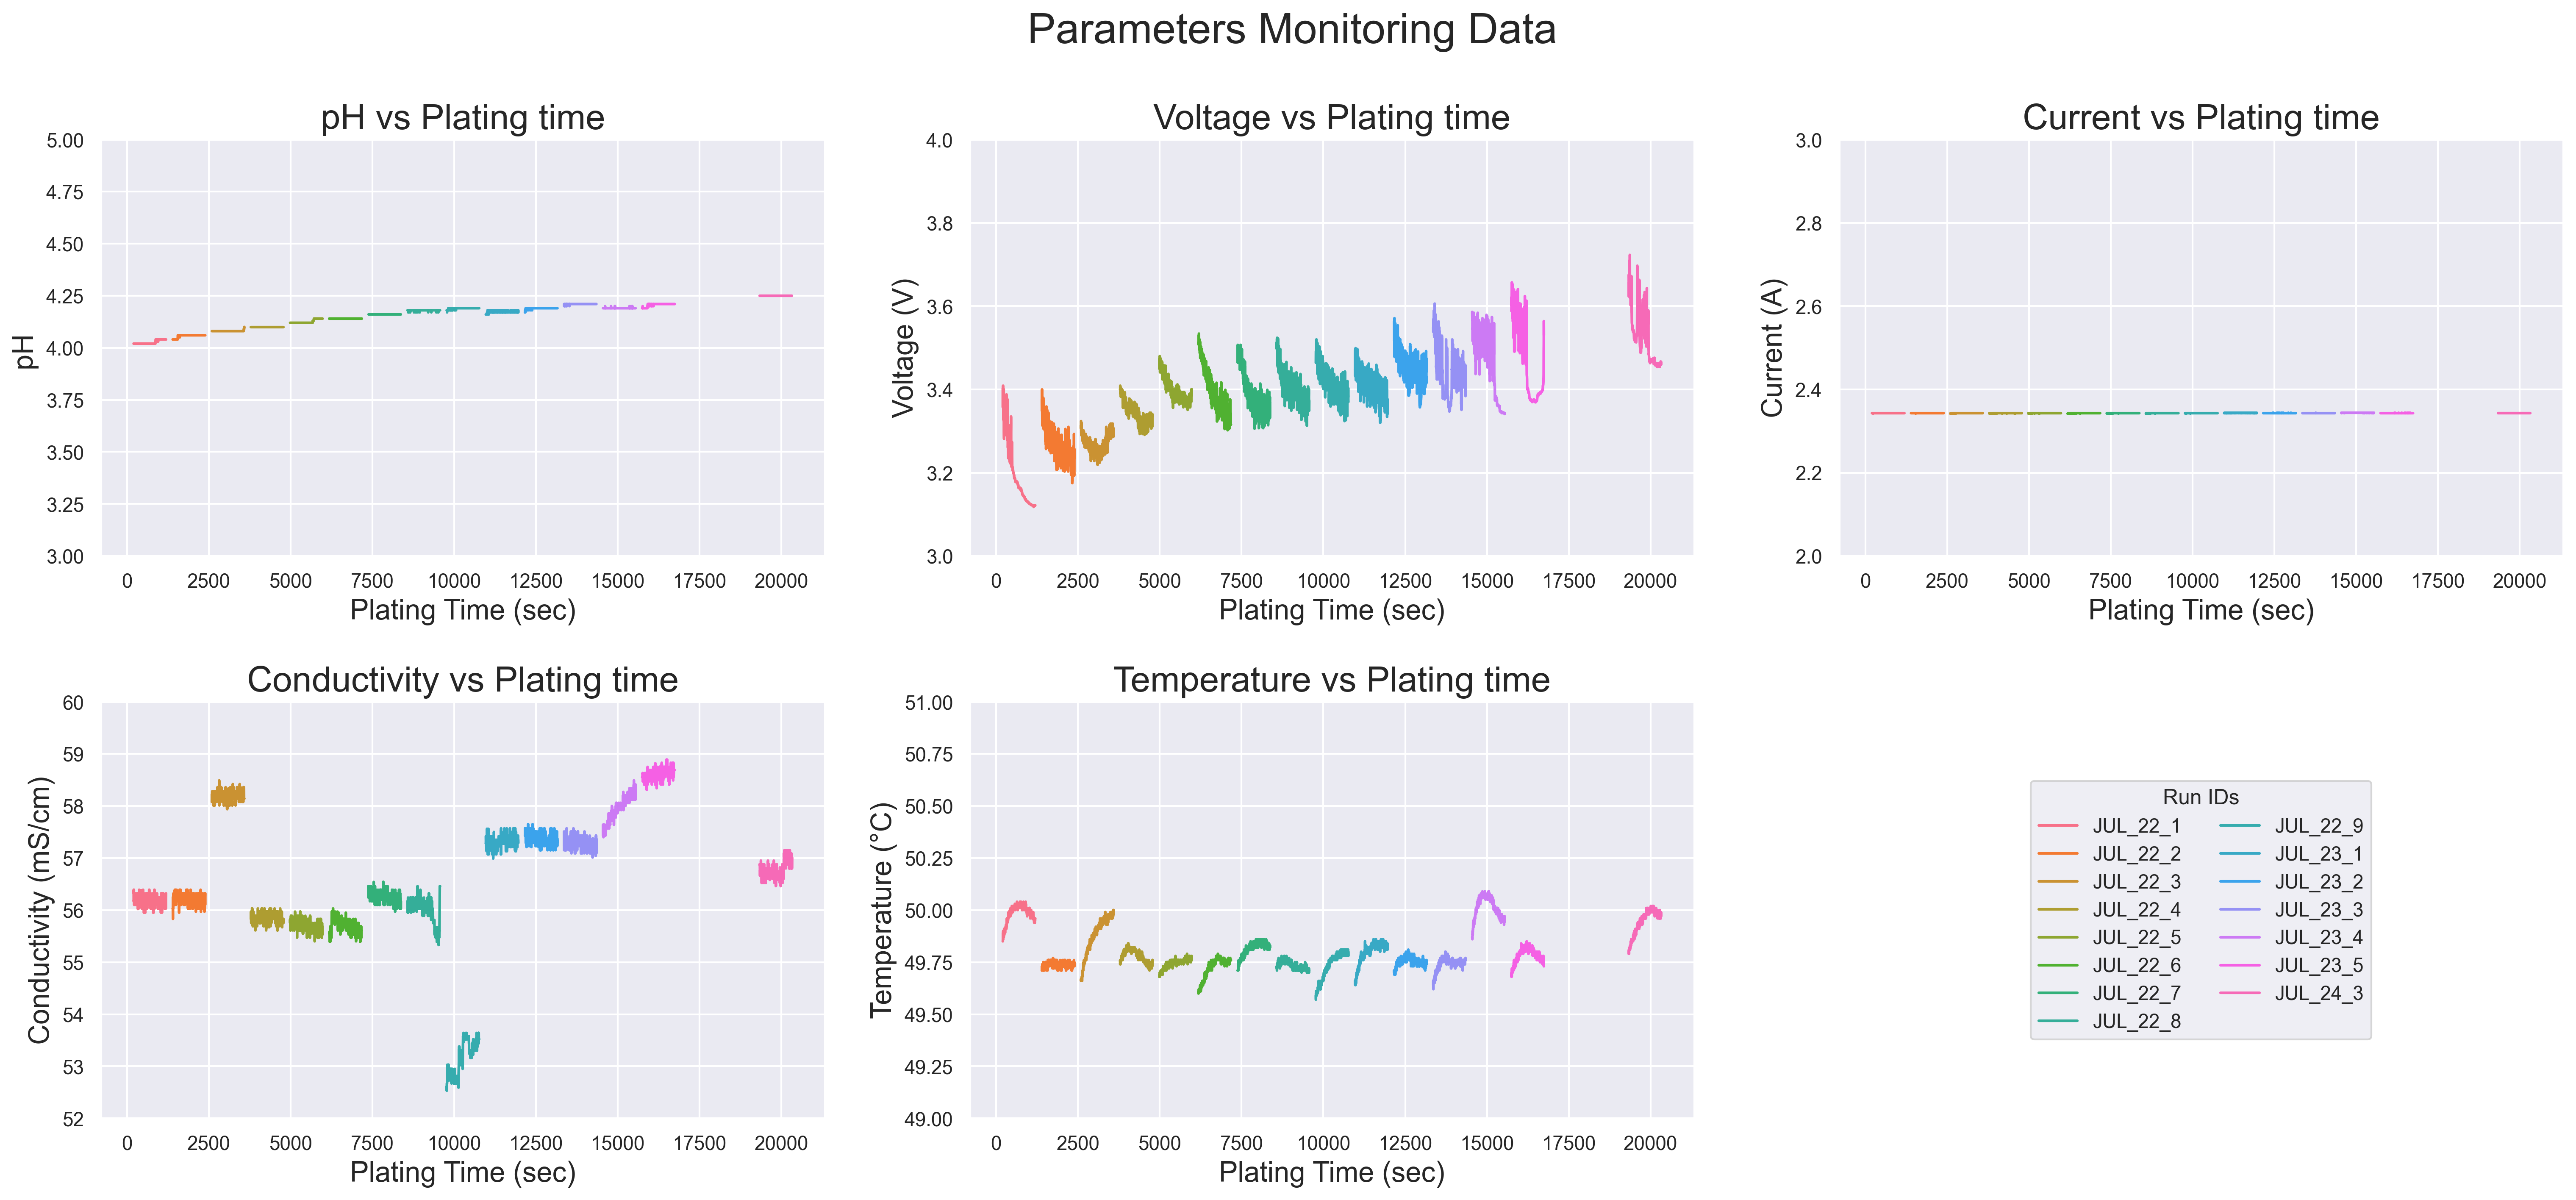

In [12]:
PARAMS = {
	# Default P' TJ
	# 'pH': [2, 5],
	# 'voltage': [0, 5],
	# Need to change due to the platinum anode cause lower pH and higher voltage
	'pH': [3, 5],
	'voltage': [3, 4],
	'current': [2, 3],
	# 'conductivity': [48, 70],
	'conductivity': [52, 60],
	'temperature': [49, 51]
}

plot_all_params(Filter_df, filter_id, PARAMS)

In [13]:
Filter_df.to_excel('Datasets/Filtered_Normal_Data.xlsx', index=False)

In [14]:
Filter_df[Filter_df['run_id']=='JUL_23_3']

run_id           timestamp  time  time_total  area cathode   anode  \
5478  JUL_23_3 2025-07-23 10:42:55     2       13358    67   Brass  Nickel   
5479  JUL_23_3 2025-07-23 10:42:57     2       13360    67   Brass  Nickel   
5480  JUL_23_3 2025-07-23 10:42:59     2       13362    67   Brass  Nickel   
5481  JUL_23_3 2025-07-23 10:43:01     2       13364    67   Brass  Nickel   
5482  JUL_23_3 2025-07-23 10:43:03     2       13366    67   Brass  Nickel   
...        ...                 ...   ...         ...   ...     ...     ...   
5968  JUL_23_3 2025-07-23 10:59:17     2       14338    67   Brass  Nickel   
5969  JUL_23_3 2025-07-23 10:59:19     2       14340    67   Brass  Nickel   
5970  JUL_23_3 2025-07-23 10:59:21     2       14342    67   Brass  Nickel   
5971  JUL_23_3 2025-07-23 10:59:24     2       14344    67   Brass  Nickel   
5972  JUL_23_3 2025-07-23 10:59:26     2       14346    67   Brass  Nickel   

      mass_SLS  mass_NISO4  mass_NICL2  ...    pH  Anomaly P temperature  \
5478      0.35       270.0        40.0  ...  4.21          N       49.64   
5479      0.35       270.0        40.0  ...  4.20          N       49.66   
5480      0.35       270.0        40.0  ...  4.20          N       49.62   
5481      0.35       270.0        40.0  ...  4.20          N       49.66   
5482      0.35       270.0        40.0  ...  4.20          N       49.65   
...        ...         ...         ...  ...   ...        ...         ...   
5968      0.35       270.0        40.0  ...  4.21          N       49.76   
5969      0.35       270.0        40.0  ...  4.21          N       49.76   
5970      0.35       270.0        40.0  ...  4.21          N       49.76   
5971      0.35       270.0        40.0  ...  4.21          N       49.77   
5972      0.35       270.0        40.0  ...  4.21          N       49.76   

      Anomaly T voltage  Anomaly V current  amp_hour deposition_rate  bath_id  
5478          N   3.549          N   2.343     8.694          0.6299   Bath_3  
5479          N   3.538          N   2.343     8.696          0.6299   Bath_3  
5480          N   3.539          N   2.343     8.697          0.6299   Bath_3  
5481          N   3.559          N   2.343     8.698          0.6299   Bath_3  
5482          N   3.570          N   2.343     8.700          0.6299   Bath_3  
...         ...     ...        ...     ...       ...             ...      ...  
5968          N   3.453          N   2.343     9.332          0.6299   Bath_3  
5969          N   3.432          N   2.343     9.334          0.6299   Bath_3  
5970          N   3.458          N   2.343     9.335          0.6299   Bath_3  
5971          N   3.384          N   2.343     9.336          0.6299   Bath_3  
5972          N   3.414          N   2.343     9.337          0.6299   Bath_3  

[495 rows x 23 columns]

c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:200: SettingWithCopyWarning: 
A value is try

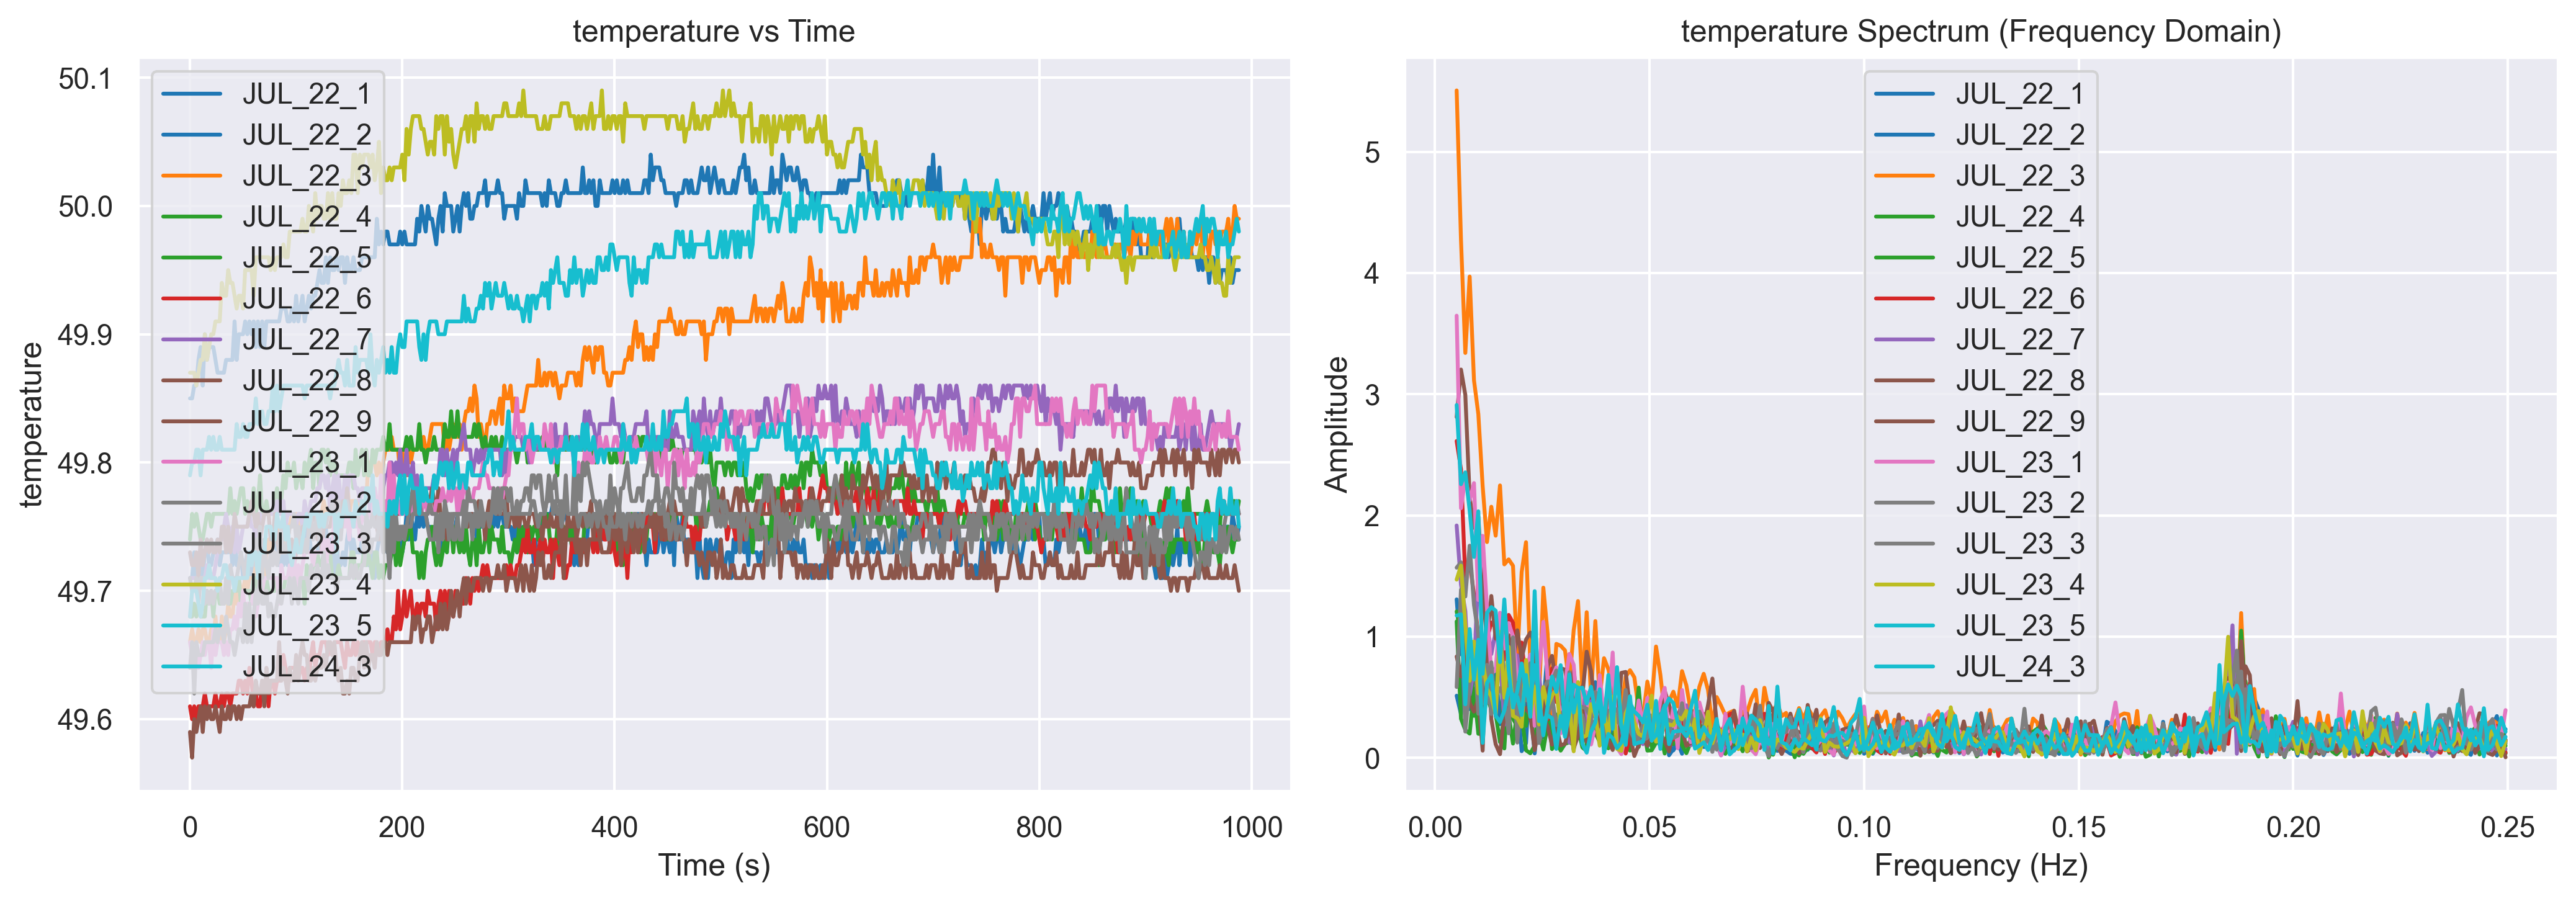

c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:13: SettingWithCopyWarning: 
A value is trying

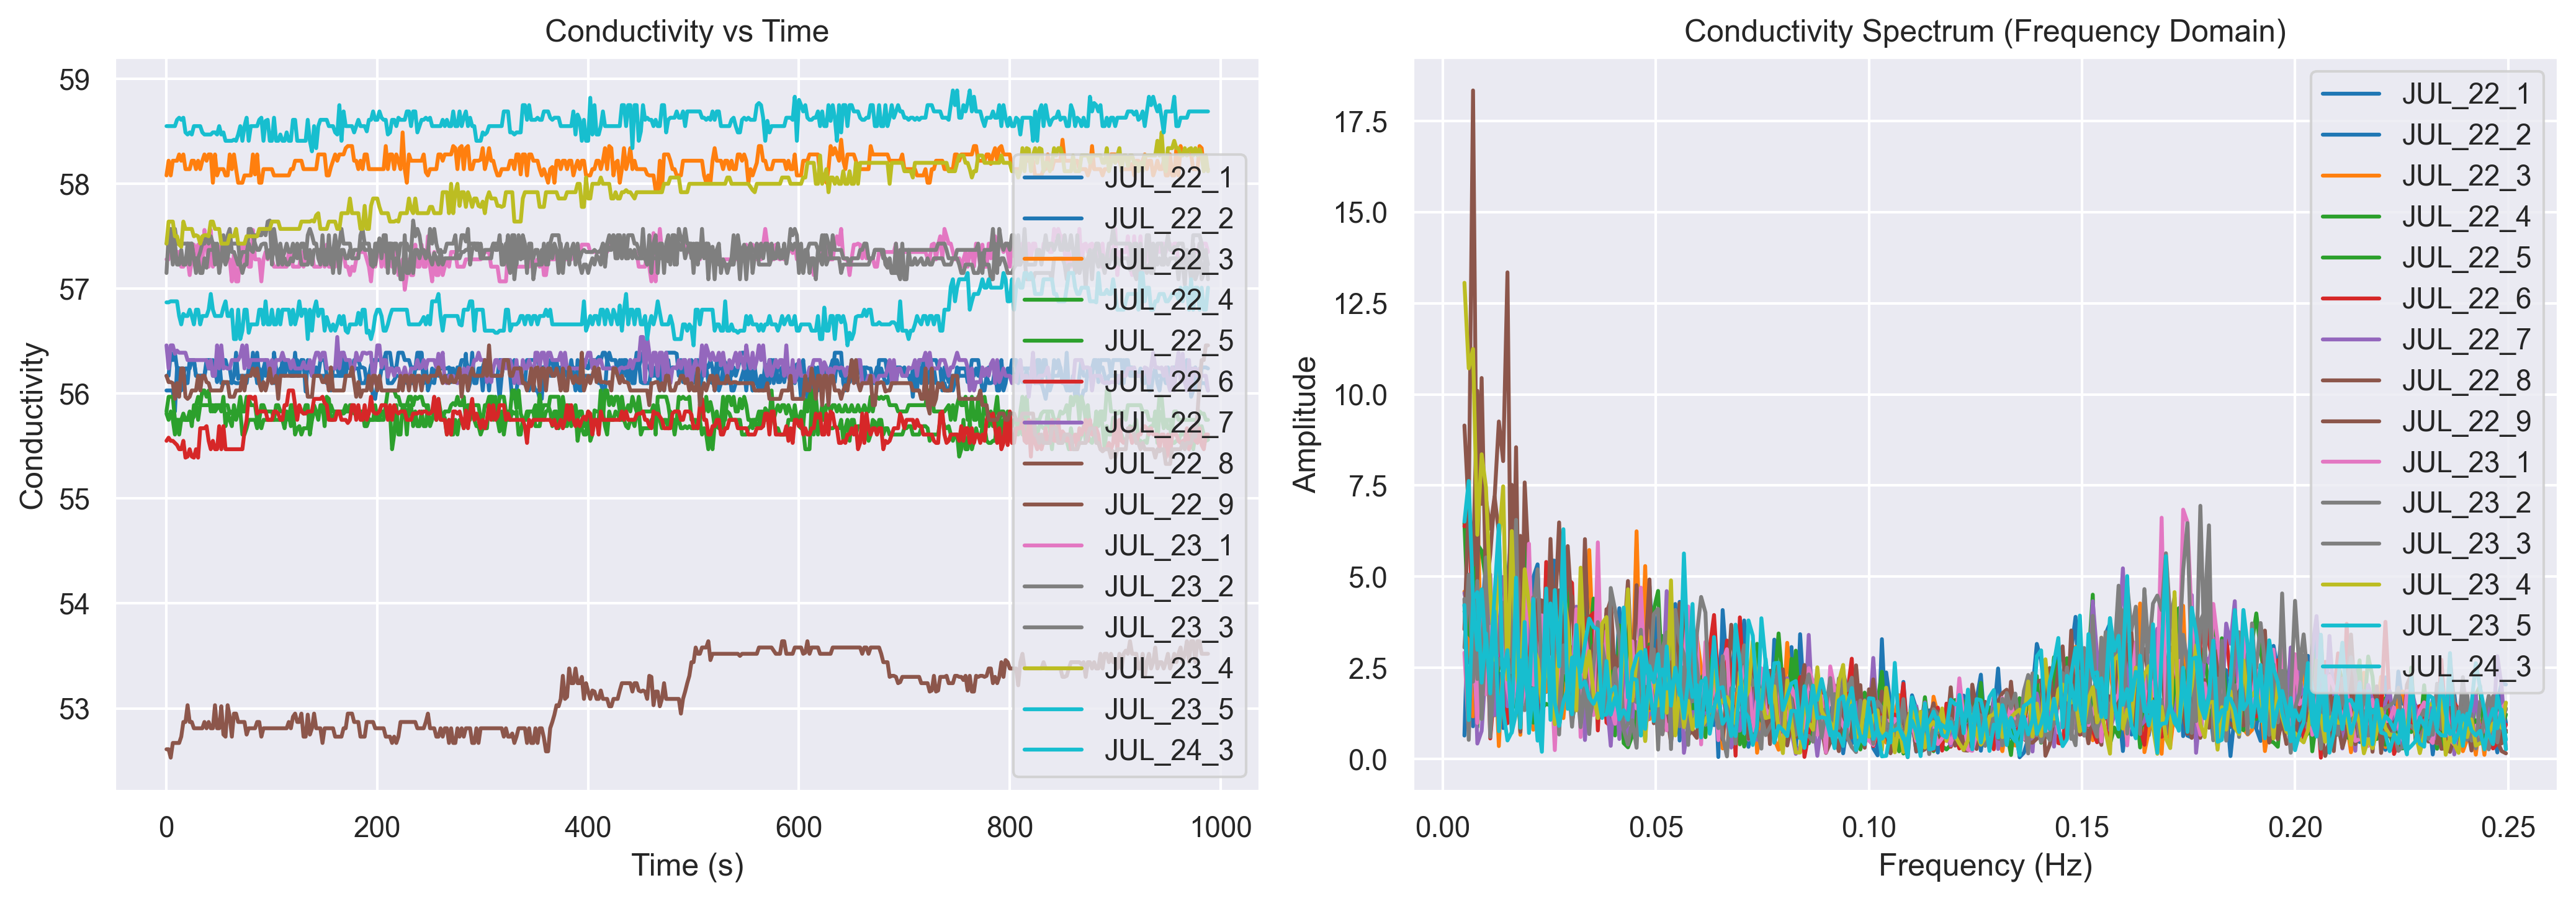

c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:76: SettingWithCopyWarning: 
A value is trying

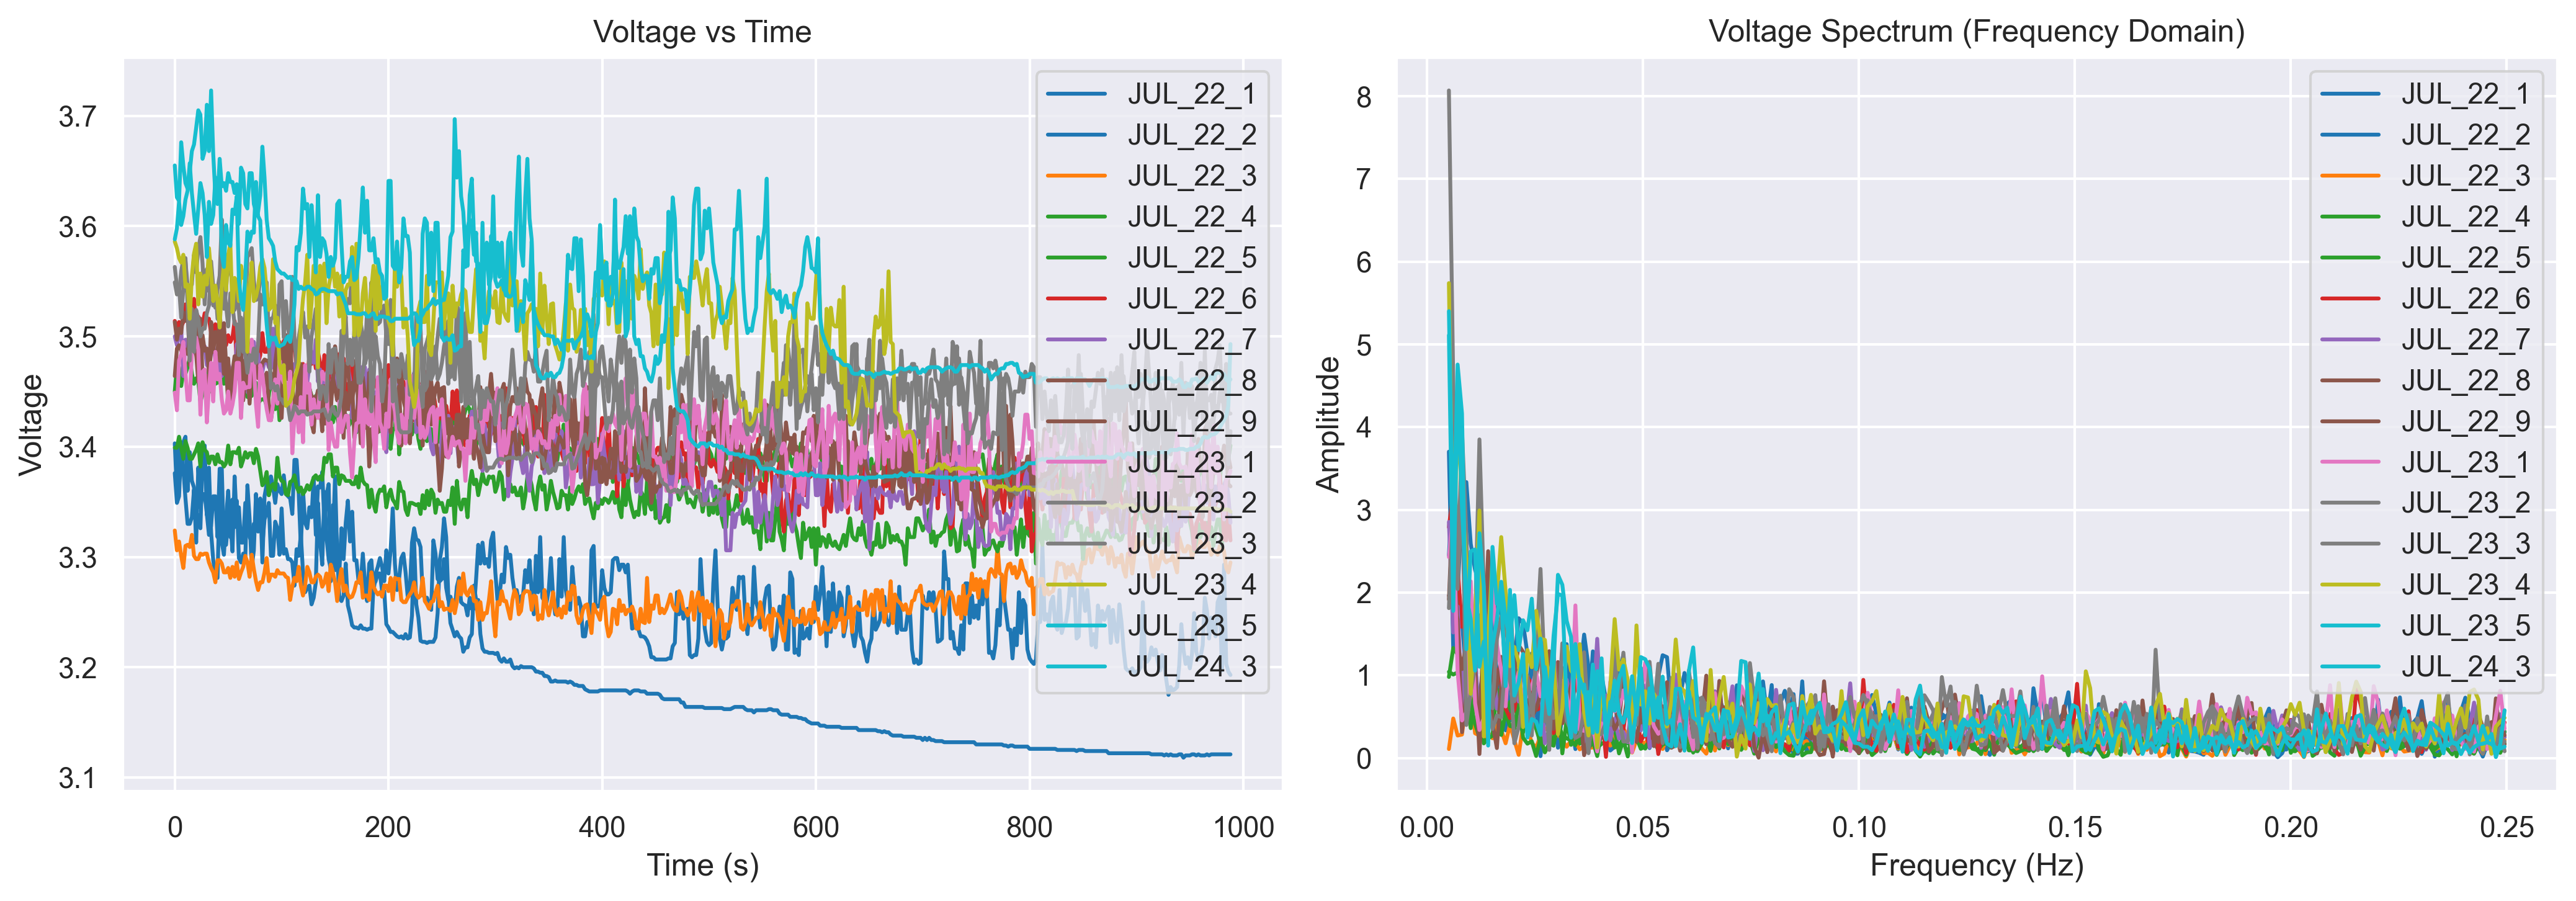

c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df['time_total'] = run_df['time_total'] - run_df['time_total'].iloc[0]
c:\Users\kittyoomm\Desktop\Work@MTEC\PlateMon_data_analytics\src\fft.py:138: SettingWithCopyWarning: 
A value is try

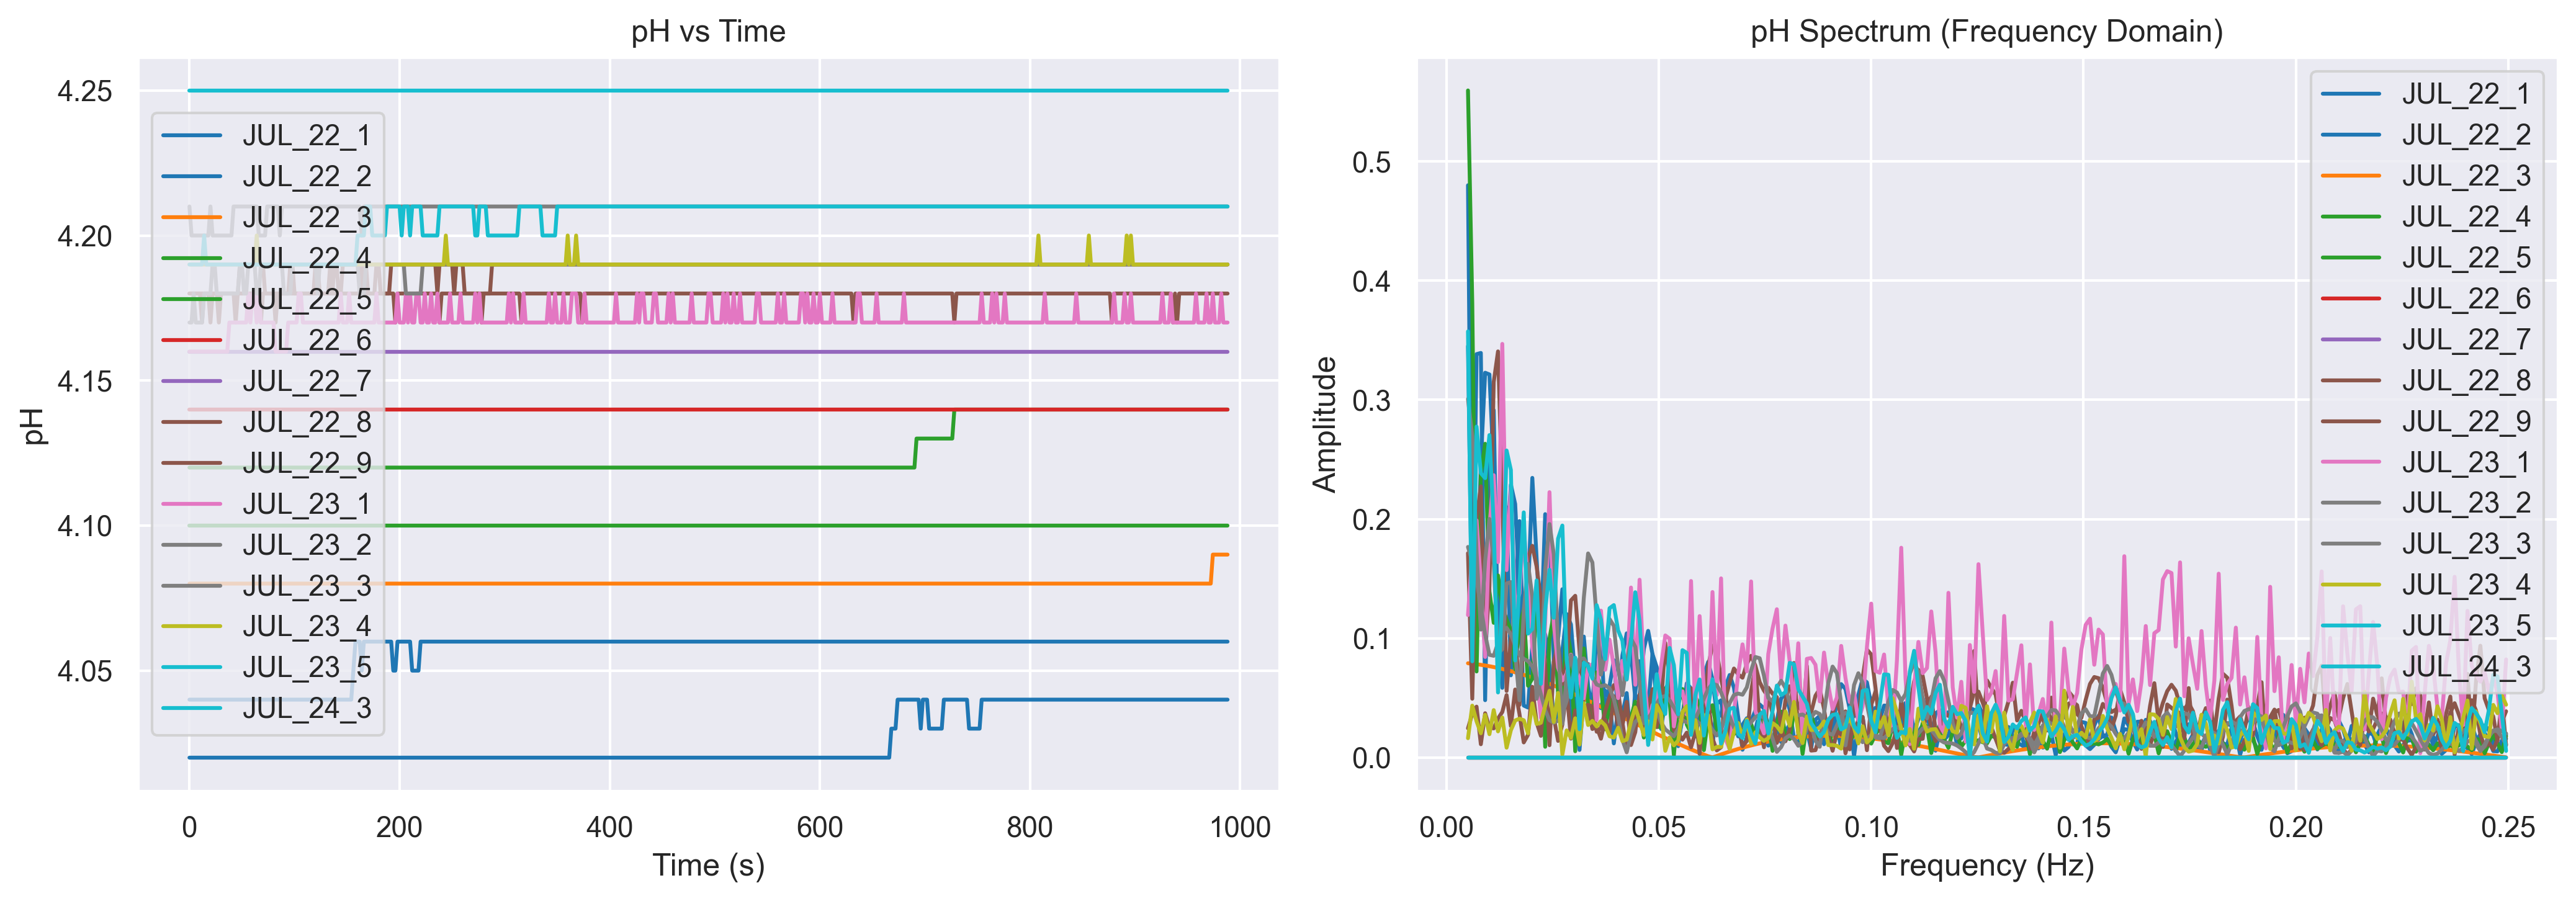

In [15]:
temperature_fft = plot_temperature_fft(df=Filter_df, bath_id=Filter_df['bath_id'], run_ids=filter_id)
temp_lim = (0, 6)
conduct_fft = plot_conductivity_fft(df=Filter_df, bath_id=Filter_df['bath_id'], run_ids=filter_id)
conduct_lim = (0, 20)
voltage_fft = plot_voltage_fft(df=Filter_df, bath_id=Filter_df['bath_id'], run_ids=filter_id)
volt_lim = (0, 9)
pH_fft = plot_pH_fft(df=Filter_df, bath_id=Filter_df['bath_id'], run_ids=filter_id)
pH_lim = (0, 0.6)

In [16]:
print(len(filter_id))
print(len(pH_fft.columns))
print(len(conduct_fft.columns))
print(len(temperature_fft.columns))
print(len(voltage_fft.columns))
lst = list(pH_fft.columns)
run_list = filter_id.copy()
for col in lst:
    if "freq_" in col:
        run = col.lstrip("freq_")
        if run in run_list:
            run_list.remove(run)

print(run_list)

15
30
30
30
30
[]


In [17]:
for run in filter_id:
    print(f'pH value in {run}: {Filter_df['pH'][Filter_df['run_id']==run].unique()}')

pH value in JUL_22_1: [4.02 4.03 4.04]
pH value in JUL_22_2: [4.04 4.05 4.06]
pH value in JUL_22_3: [4.08 4.09 4.1 ]
pH value in JUL_22_4: [4.1]
pH value in JUL_22_5: [4.12 4.13 4.14]
pH value in JUL_22_6: [4.14]
pH value in JUL_22_7: [4.16]
pH value in JUL_22_8: [4.18 4.17]
pH value in JUL_22_9: [4.18 4.17 4.19]
pH value in JUL_23_1: [4.16 4.17 4.18]
pH value in JUL_23_2: [4.17 4.18 4.19]
pH value in JUL_23_3: [4.21 4.2 ]
pH value in JUL_23_4: [4.19 4.2 ]
pH value in JUL_23_5: [4.19 4.2  4.21]
pH value in JUL_24_3: [4.25]


Aggregated plots (Including all parameter and fourier transformed data)

In [19]:
plt.ioff()

for run in filter_id:
    df = Filter_df[Filter_df['run_id']==run].copy().reset_index(drop=True)
    df['index'] = df.index
    idx = filter_id.index(run)
    
    fig, ax = plt.subplots(8, 1, figsize=(15, 40))
    plt.title(f'Aggregated Plots for Run ID: {run}', fontsize=16)
    
    ax1 = sns.lineplot(data=df, x='index', y='conductivity', color="blue", ax=ax[0])
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Conductivity (mS/cm)')
    ax1.set_ylim(PARAMS['conductivity'][0], PARAMS['conductivity'][1])
    ax1.set_title(f'Run ID: {run} - Conductivity over Time')
    
    ax3 = sns.lineplot(data=df, x='index', y='temperature', color="blue", ax=ax[1])
    ax3.set_xlabel('Timestamp')
    ax3.set_ylabel('Temperature (°C)')
    ax3.set_ylim(PARAMS['temperature'][0], PARAMS['temperature'][1])
    ax3.set_title(f'Run ID: {run} - Temperature over Time')
    
    ax5 = sns.lineplot(data=df, x='index', y='pH', color="blue", ax=ax[2])
    ax5.set_xlabel('Timestamp')
    ax5.set_ylabel('pH Level')
    ax5.set_ylim(PARAMS['pH'][0], PARAMS['pH'][1])
    ax5.set_title(f'Run ID: {run} - pH over Time')
      
    ax7 = sns.lineplot(data=df, x='index', y='voltage', color="blue", ax=ax[3])
    ax7.set_xlabel('Timestamp')
    ax7.set_ylabel('Voltage (V)')
    ax7.set_ylim(PARAMS['voltage'][0], PARAMS['voltage'][1])
    ax7.set_title(f'Run ID: {run} - Voltage over Time')
    
    conduct_fft_data = conduct_fft.iloc[:, 2*idx:2*idx+2]
    ax2 = sns.lineplot(data=conduct_fft_data, x=conduct_fft_data.columns[0], y=conduct_fft_data.columns[1], color="blue", ax=ax[4])
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('FFT Amplitude')
    ax2.set_ylim(0, conduct_lim[1])
    ax2.set_title(f'Run ID: {run} - Conductivity FFT')
    
    temperature_fft_data = temperature_fft.iloc[:, 2*idx:2*idx+2]
    ax4 = sns.lineplot(data=temperature_fft_data, x=temperature_fft_data.columns[0], y=temperature_fft_data.columns[1], color="blue", ax=ax[5])
    ax4.set_xlabel('Frequency (Hz)')
    ax4.set_ylabel('FFT Amplitude')
    ax4.set_ylim(0, temp_lim[1])
    ax4.set_title(f'Run ID: {run} - Temperature FFT')
    
    pH_fft_data = pH_fft.iloc[:, 2*idx:2*idx+2]
    ax6 = sns.lineplot(data=pH_fft_data, x=pH_fft_data.columns[0], y=pH_fft_data.columns[1], color="blue", ax=ax[6])
    ax6.set_xlabel('Frequency (Hz)')
    ax6.set_ylabel('FFT Amplitude')
    ax6.set_ylim(0, pH_lim[1])
    ax6.set_title(f'Run ID: {run} - pH FFT')
    
    voltage_fft_data = voltage_fft.iloc[:, 2*idx:2*idx+2]
    ax8 = sns.lineplot(data=voltage_fft_data, x=voltage_fft_data.columns[0], y=voltage_fft_data.columns[1], color="blue", ax=ax[7])
    ax8.set_xlabel('Frequency (Hz)')
    ax8.set_ylabel('FFT Amplitude')
    ax8.set_ylim(0, volt_lim[1])
    ax8.set_title(f'Run ID: {run} - Voltage FFT')
    
    print(f'Generating aggregated plots for Run ID: {run}')
    plt.tight_layout()
    plt.savefig(f'Plots/Aggregated_Plots_{run}.png')

Generating aggregated plots for Run ID: JUL_22_1
Generating aggregated plots for Run ID: JUL_22_2
Generating aggregated plots for Run ID: JUL_22_3
Generating aggregated plots for Run ID: JUL_22_4
Generating aggregated plots for Run ID: JUL_22_5


C:\Users\kittyoomm\AppData\Local\Temp\ipykernel_5112\992994405.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(8, 1, figsize=(15, 40))


Generating aggregated plots for Run ID: JUL_22_6
Generating aggregated plots for Run ID: JUL_22_7
Generating aggregated plots for Run ID: JUL_22_8
Generating aggregated plots for Run ID: JUL_22_9
Generating aggregated plots for Run ID: JUL_23_1
Generating aggregated plots for Run ID: JUL_23_2
Generating aggregated plots for Run ID: JUL_23_3
Generating aggregated plots for Run ID: JUL_23_4
Generating aggregated plots for Run ID: JUL_23_5
Generating aggregated plots for Run ID: JUL_24_3


In [21]:
CC_df = Filter_df[['conductivity', 'temperature', 'pH', 'voltage']]
CC_df

conductivity  temperature    pH  voltage
0            56.17        49.85  4.02    3.403
1            56.17        49.85  4.02    3.357
2            56.39        49.86  4.02    3.399
3            56.32        49.86  4.02    3.395
4            56.39        49.88  4.02    3.404
...            ...          ...   ...      ...
7463         56.80        49.99  4.25    3.459
7464         57.01        49.98  4.25    3.461
7465         56.80        49.97  4.25    3.466
7466         56.80        49.98  4.25    3.463
7467         57.01        49.98  4.25    3.464

[7468 rows x 4 columns]

Pearson correlation coefficient for continous predictor variables
Show highly correlated values with an absolute value greater than 0.6 only

 Spearman correlation coefficient for continous predictor variables
Show highly correlated values with an absolute value greater than 0.6 only


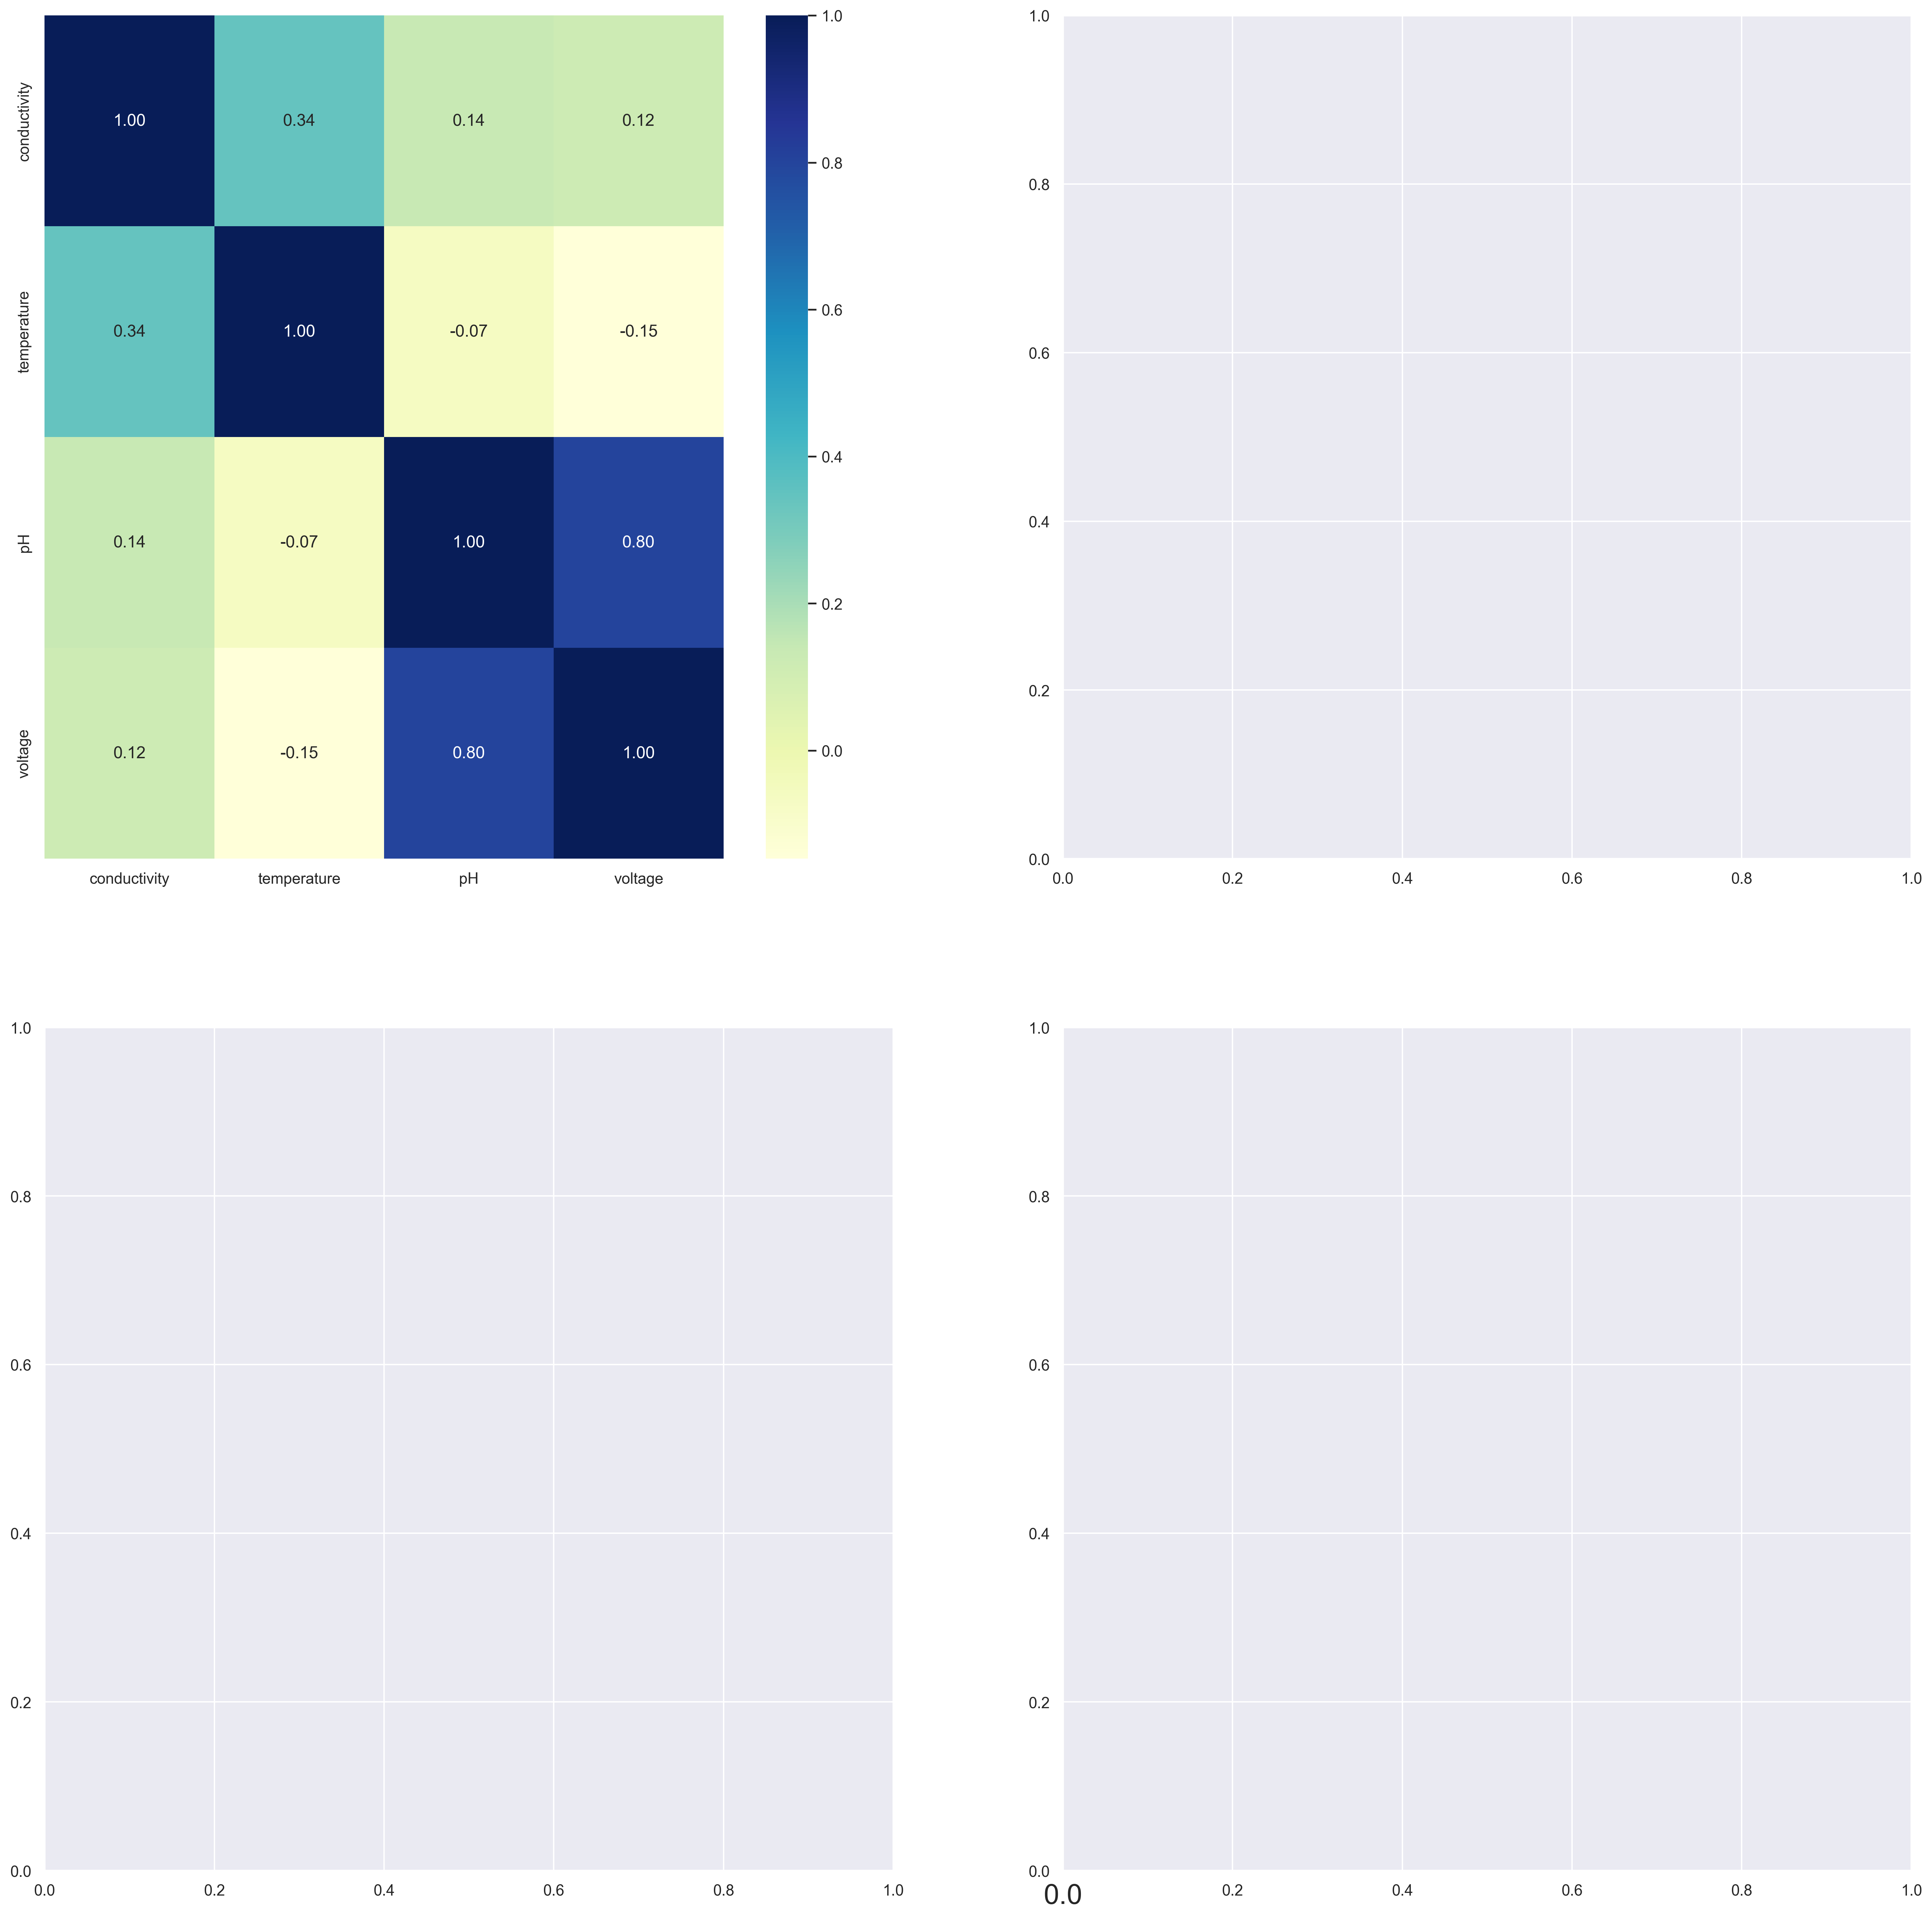

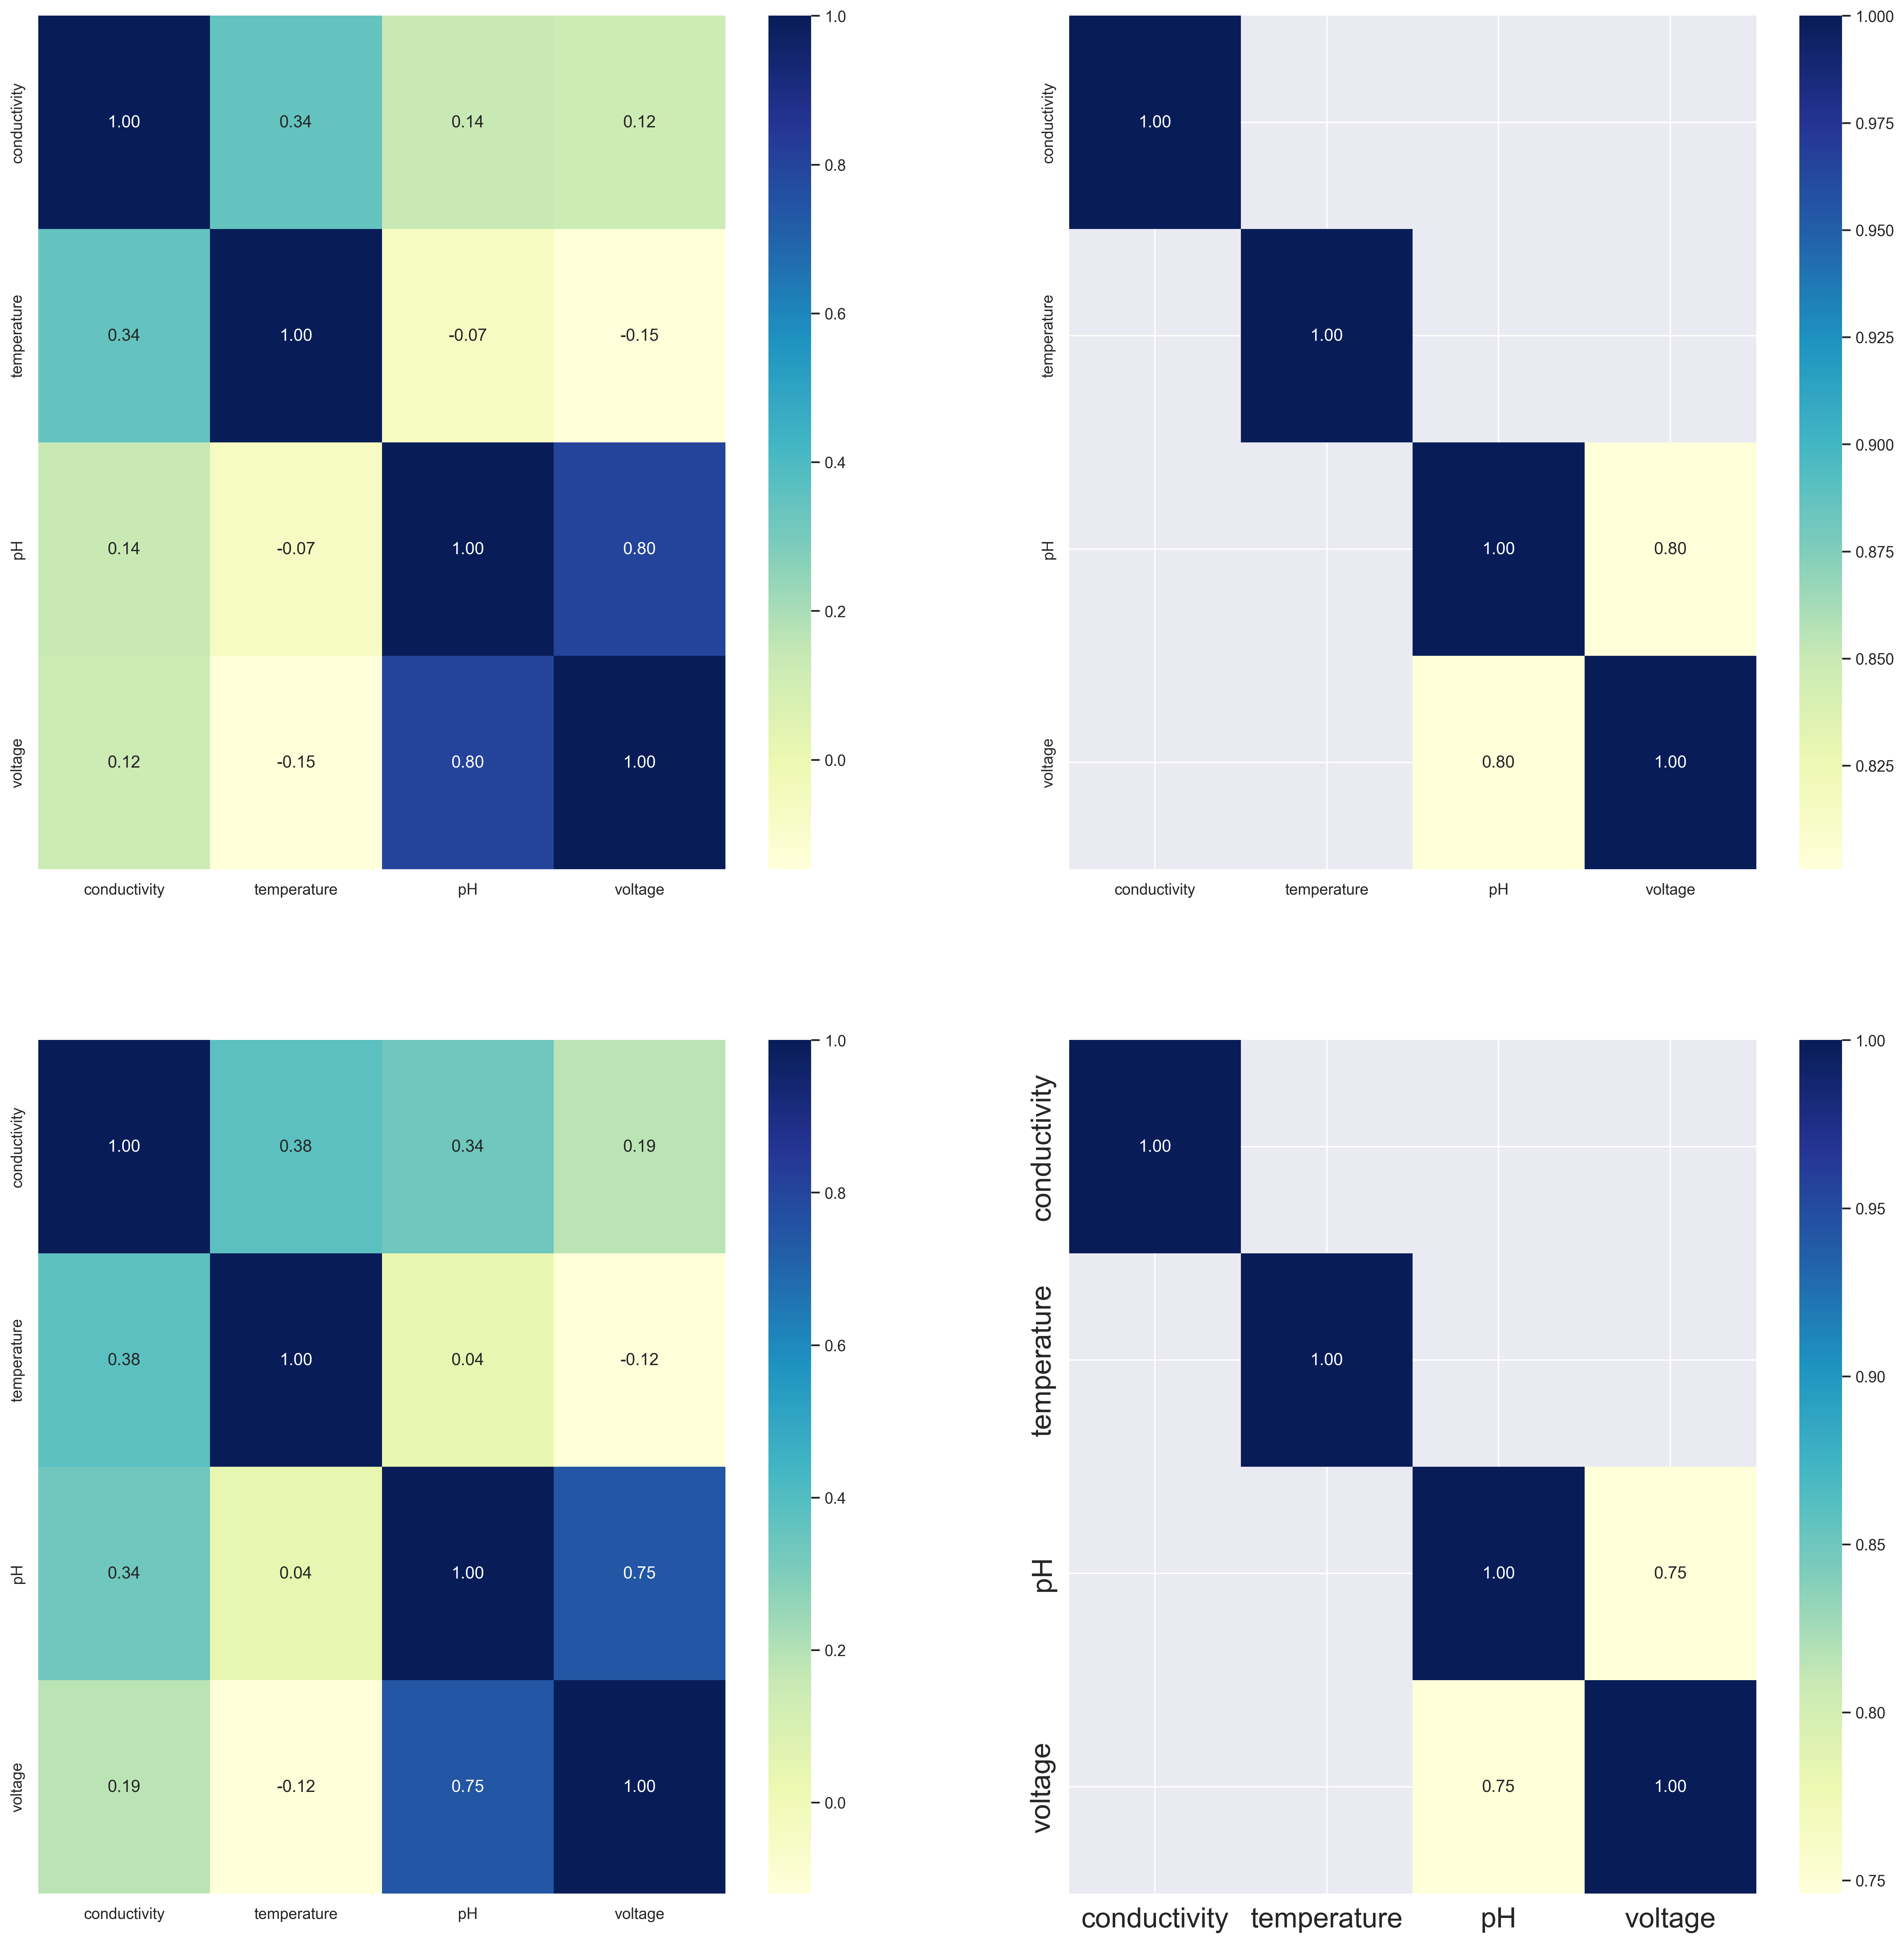

In [25]:
# Plot correlation between continous predictor variables
pearson_corr_threshold = 0.6
spearman_corr_threshold = 0.6

# Show Pearson correlation coefficients matrix

plt.rcParams.update({'font.size': 12})
rotation_angle = 45

fig, ax = plt.subplots(2, 2, figsize=(24,24))
print('Pearson correlation coefficient for continous predictor variables') # to avoid adding titles to figure

ax1 = sns.heatmap(CC_df.corr(method='pearson'), annot=True, cmap="YlGnBu", fmt=".2f", ax=ax[0,0])
ax1 = plt.xticks(fontsize= 20, fontname = "Arial")
ax1 = plt.yticks(fontsize= 20, fontname = "Arial")

# Repeat figure but this time show highly correlated factors ONLY
print('Show highly correlated values with an absolute value greater than {0} only'.format(pearson_corr_threshold))

pred_pearson_corr = CC_df.corr(method='pearson')
ax2 = sns.heatmap(pred_pearson_corr[abs(pred_pearson_corr)>=pearson_corr_threshold], annot=True, cmap="YlGnBu", fmt=".2f", ax=ax[0,1])
ax2 = plt.xticks(fontsize= 20, fontname = "Arial")
ax2 = plt.yticks(fontsize= 20, fontname = "Arial")

# Also show spearman correlation coefficients matrix
print('\n Spearman correlation coefficient for continous predictor variables') # to avoid adding titles to figure

ax3 = sns.heatmap(CC_df.corr(method='spearman'), annot=True, cmap="YlGnBu", fmt=".2f", ax=ax[1,0])
ax3 = plt.xticks(fontsize= 20, fontname = "Arial")
ax3 = plt.yticks(fontsize= 20, fontname = "Arial")
#plt.savefig('figures\Spearman Correlation Matrices\Spearman_Correlation_Coefficient_Matrix.png', dpi=500)

# Repeat figure but this time show highly correlated factors ONLY
print('Show highly correlated values with an absolute value greater than {0} only'.format(spearman_corr_threshold))

pred_spearman_corr = CC_df.corr(method='spearman')
ax4 = sns.heatmap(pred_spearman_corr[abs(pred_spearman_corr)>=spearman_corr_threshold], annot=True, cmap="YlGnBu", fmt=".2f", ax=ax[1,1])
ax4 = plt.xticks(fontsize= 20, fontname = "Arial")
ax4 = plt.yticks(fontsize= 20, fontname = "Arial")
#plt.savefig('figures\Spearman Correlation Matrices\Spearman_Correlation_Coefficient_Matrix_HighOnly.png', dpi=500)

plt.show()

In [ ]:
trial_df = CC_df[['pH', 'voltage']].copy()

p_mean = trial_df['pH'].mean()
v_mean = trial_df['voltage'].mean()
offset = p_mean - v_mean
trial_df['voltage_offset'] = trial_df['voltage'] + offset

pH  voltage  voltage_offset
0     4.02    3.403        4.165303
1     4.02    3.357        4.119303
2     4.02    3.399        4.161303
3     4.02    3.395        4.157303
4     4.02    3.404        4.166303
...    ...      ...             ...
7463  4.25    3.459        4.221303
7464  4.25    3.461        4.223303
7465  4.25    3.466        4.228303
7466  4.25    3.463        4.225303
7467  4.25    3.464        4.226303

[7468 rows x 3 columns]

['conductivity', 'temperature', 'pH', 'voltage']
Plotting conductivity and temperature correlation over time.


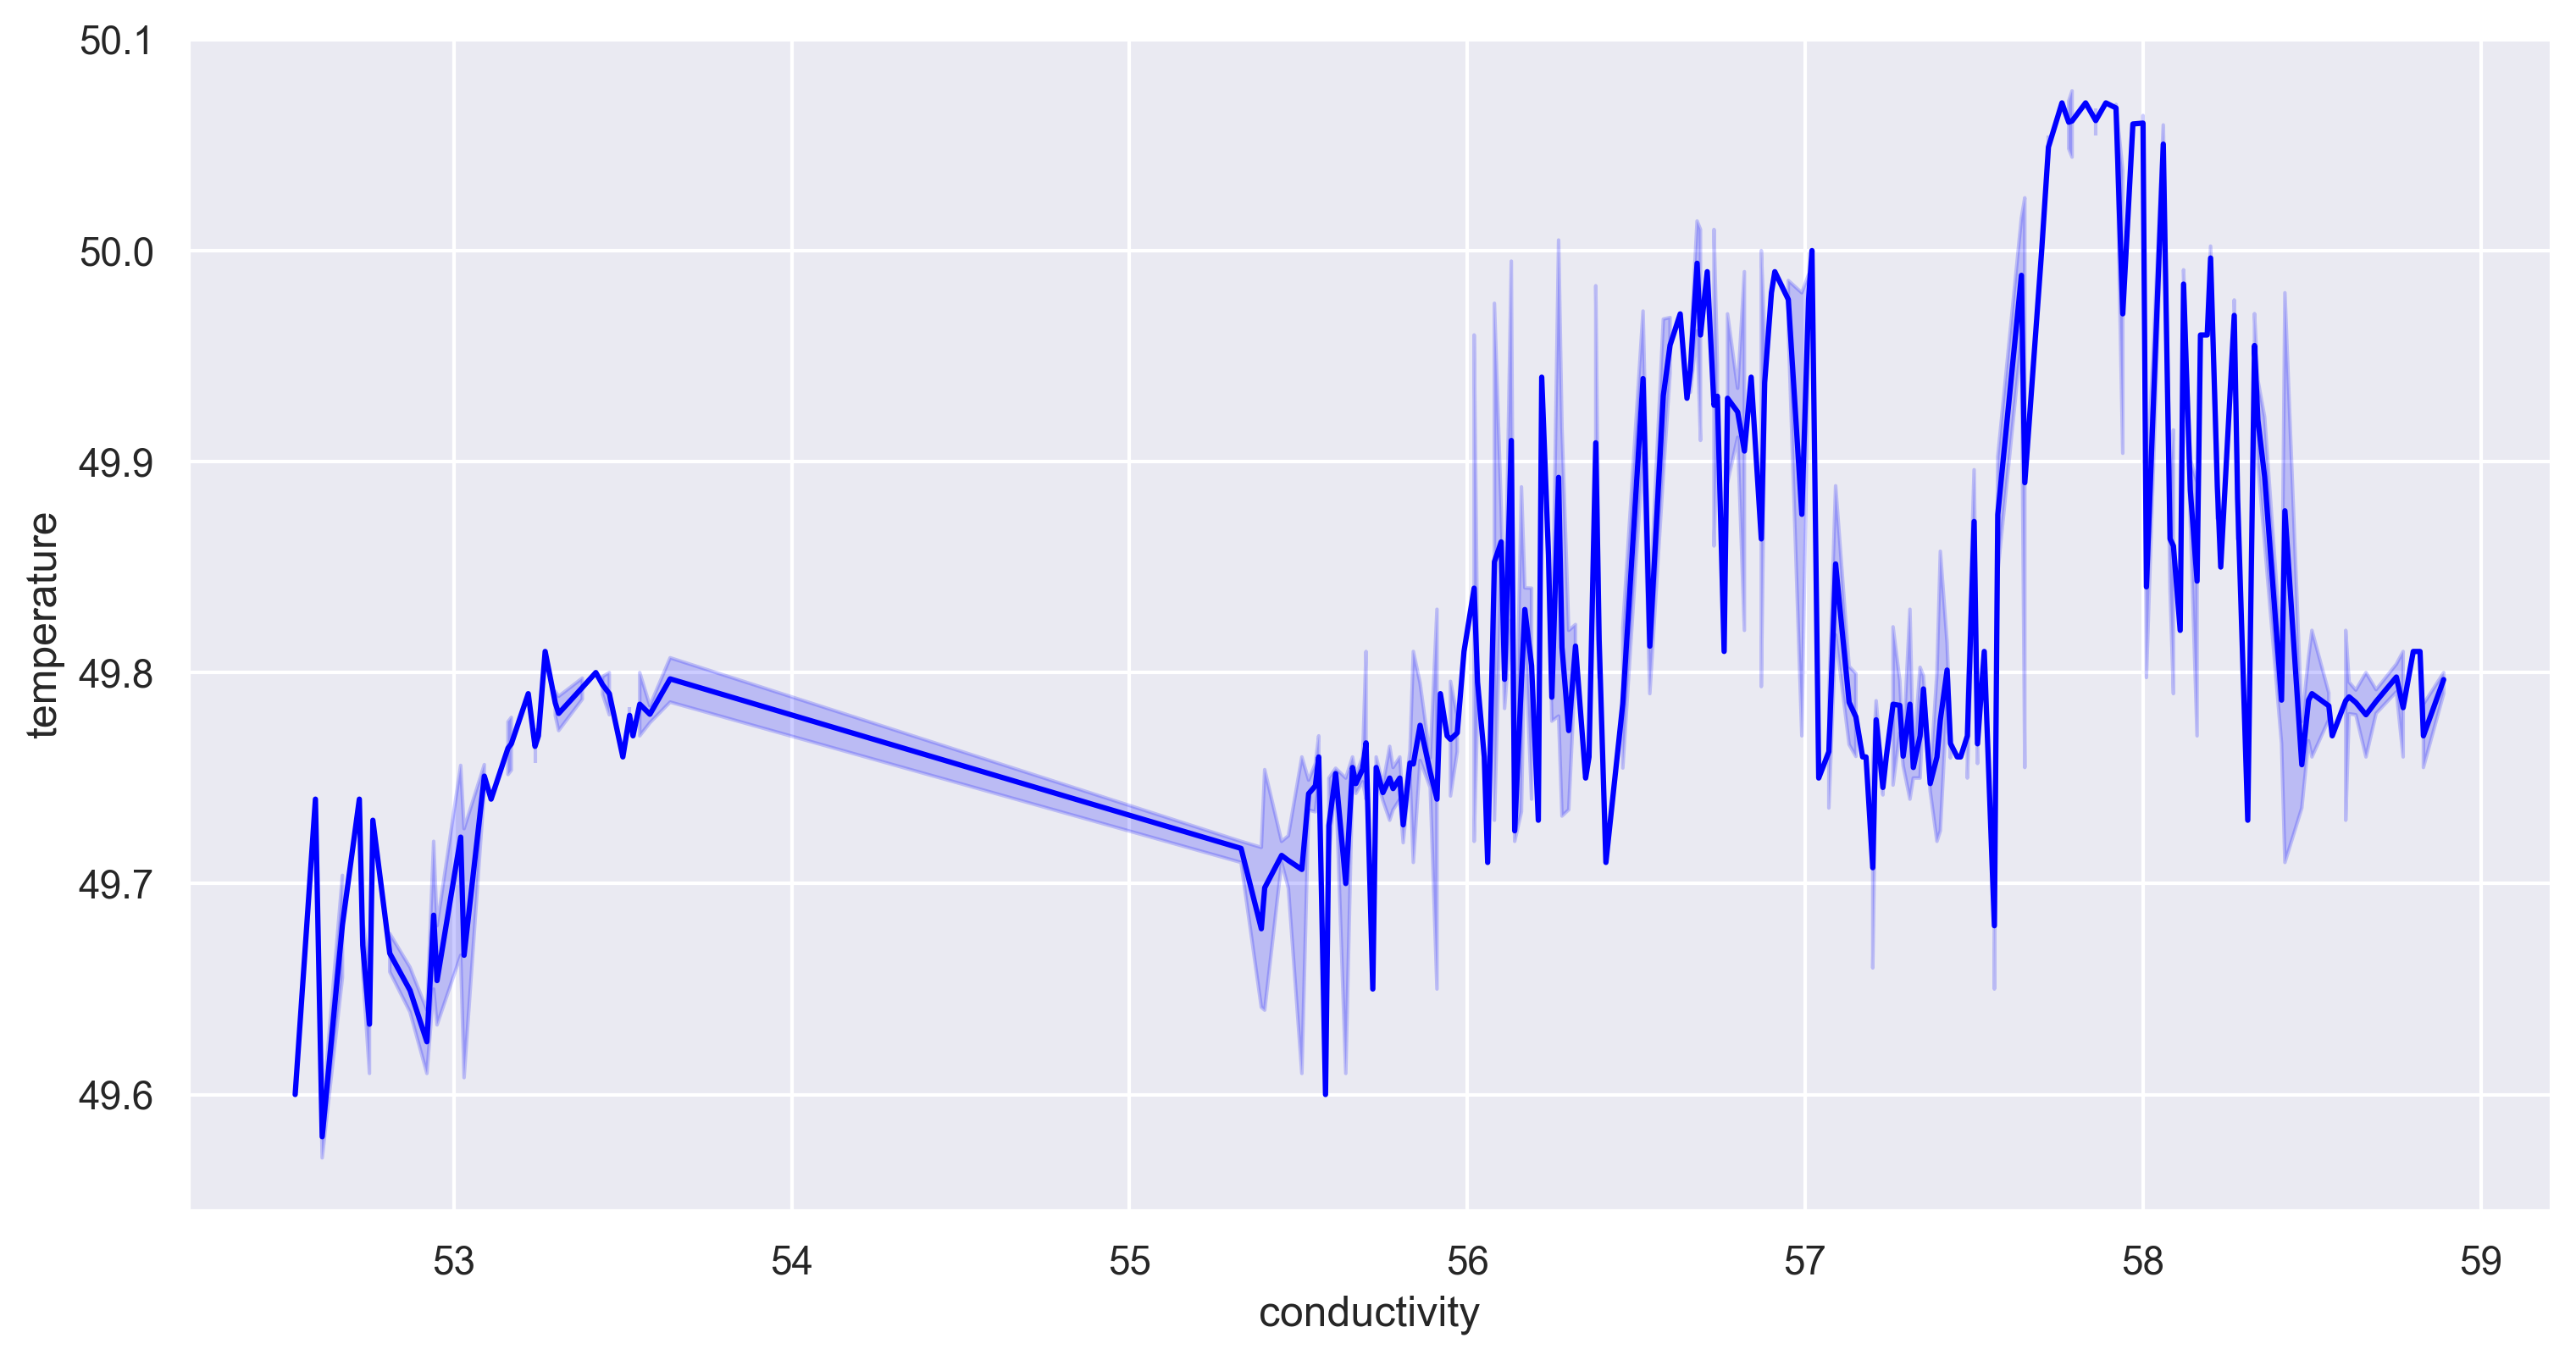

Plotting conductivity and pH correlation over time.


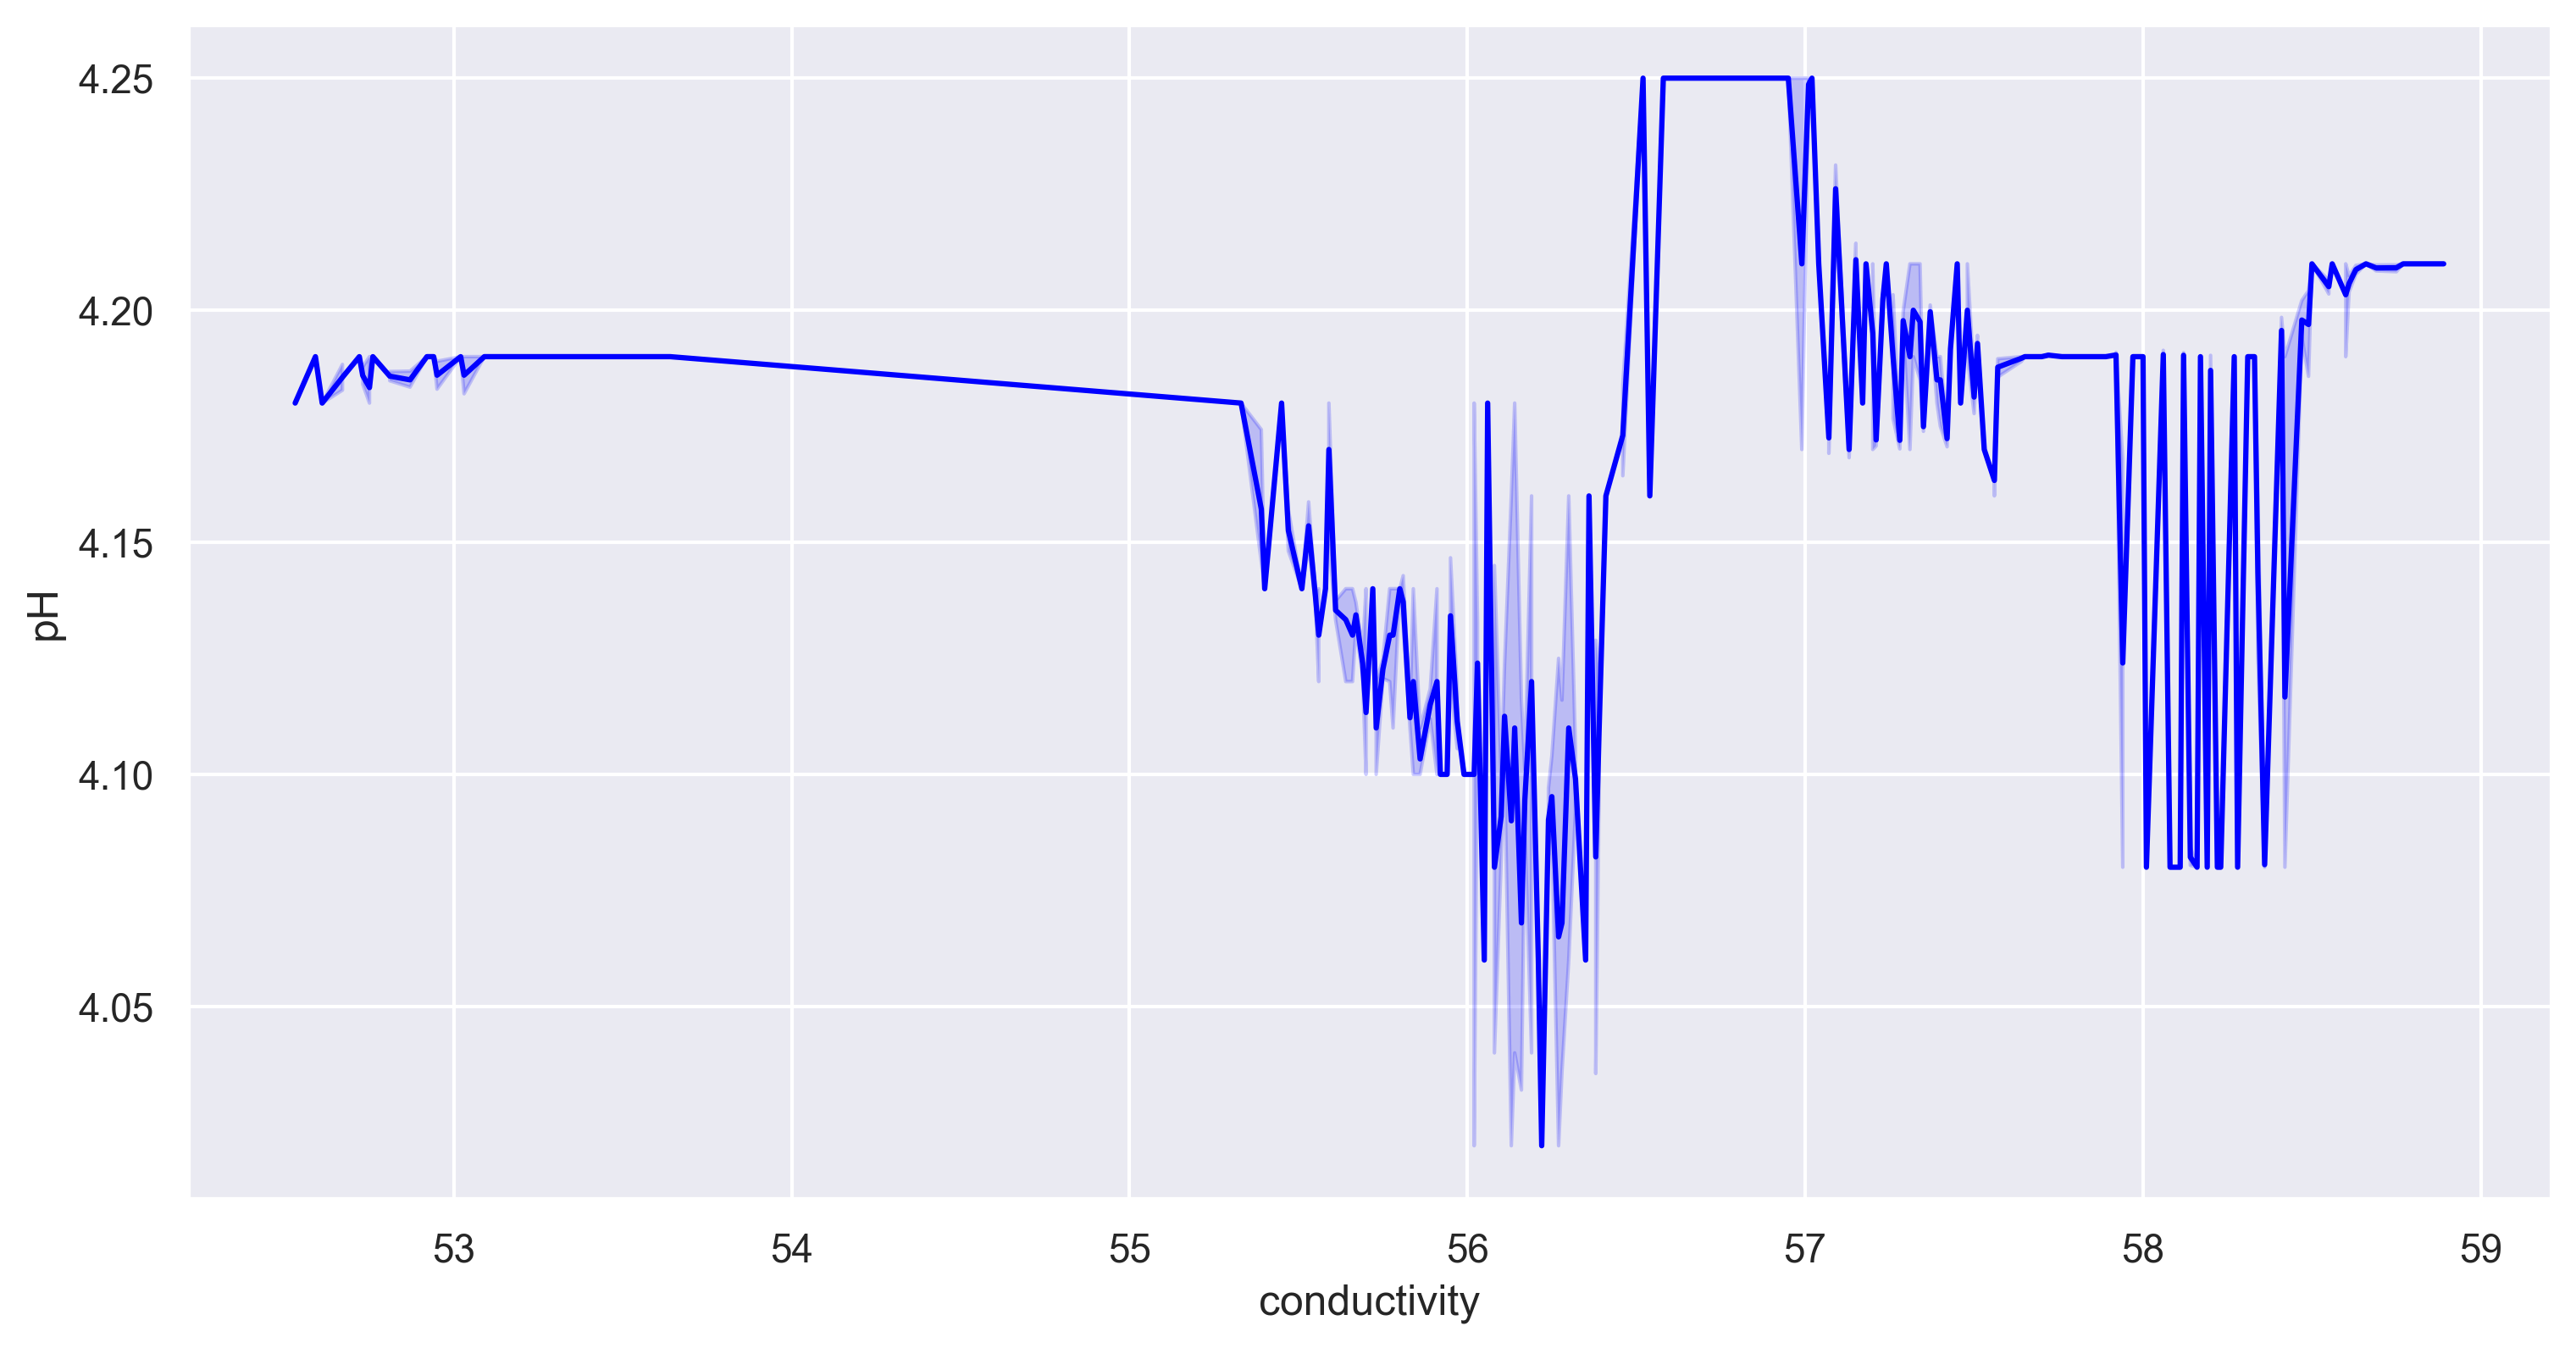

Plotting conductivity and voltage correlation over time.


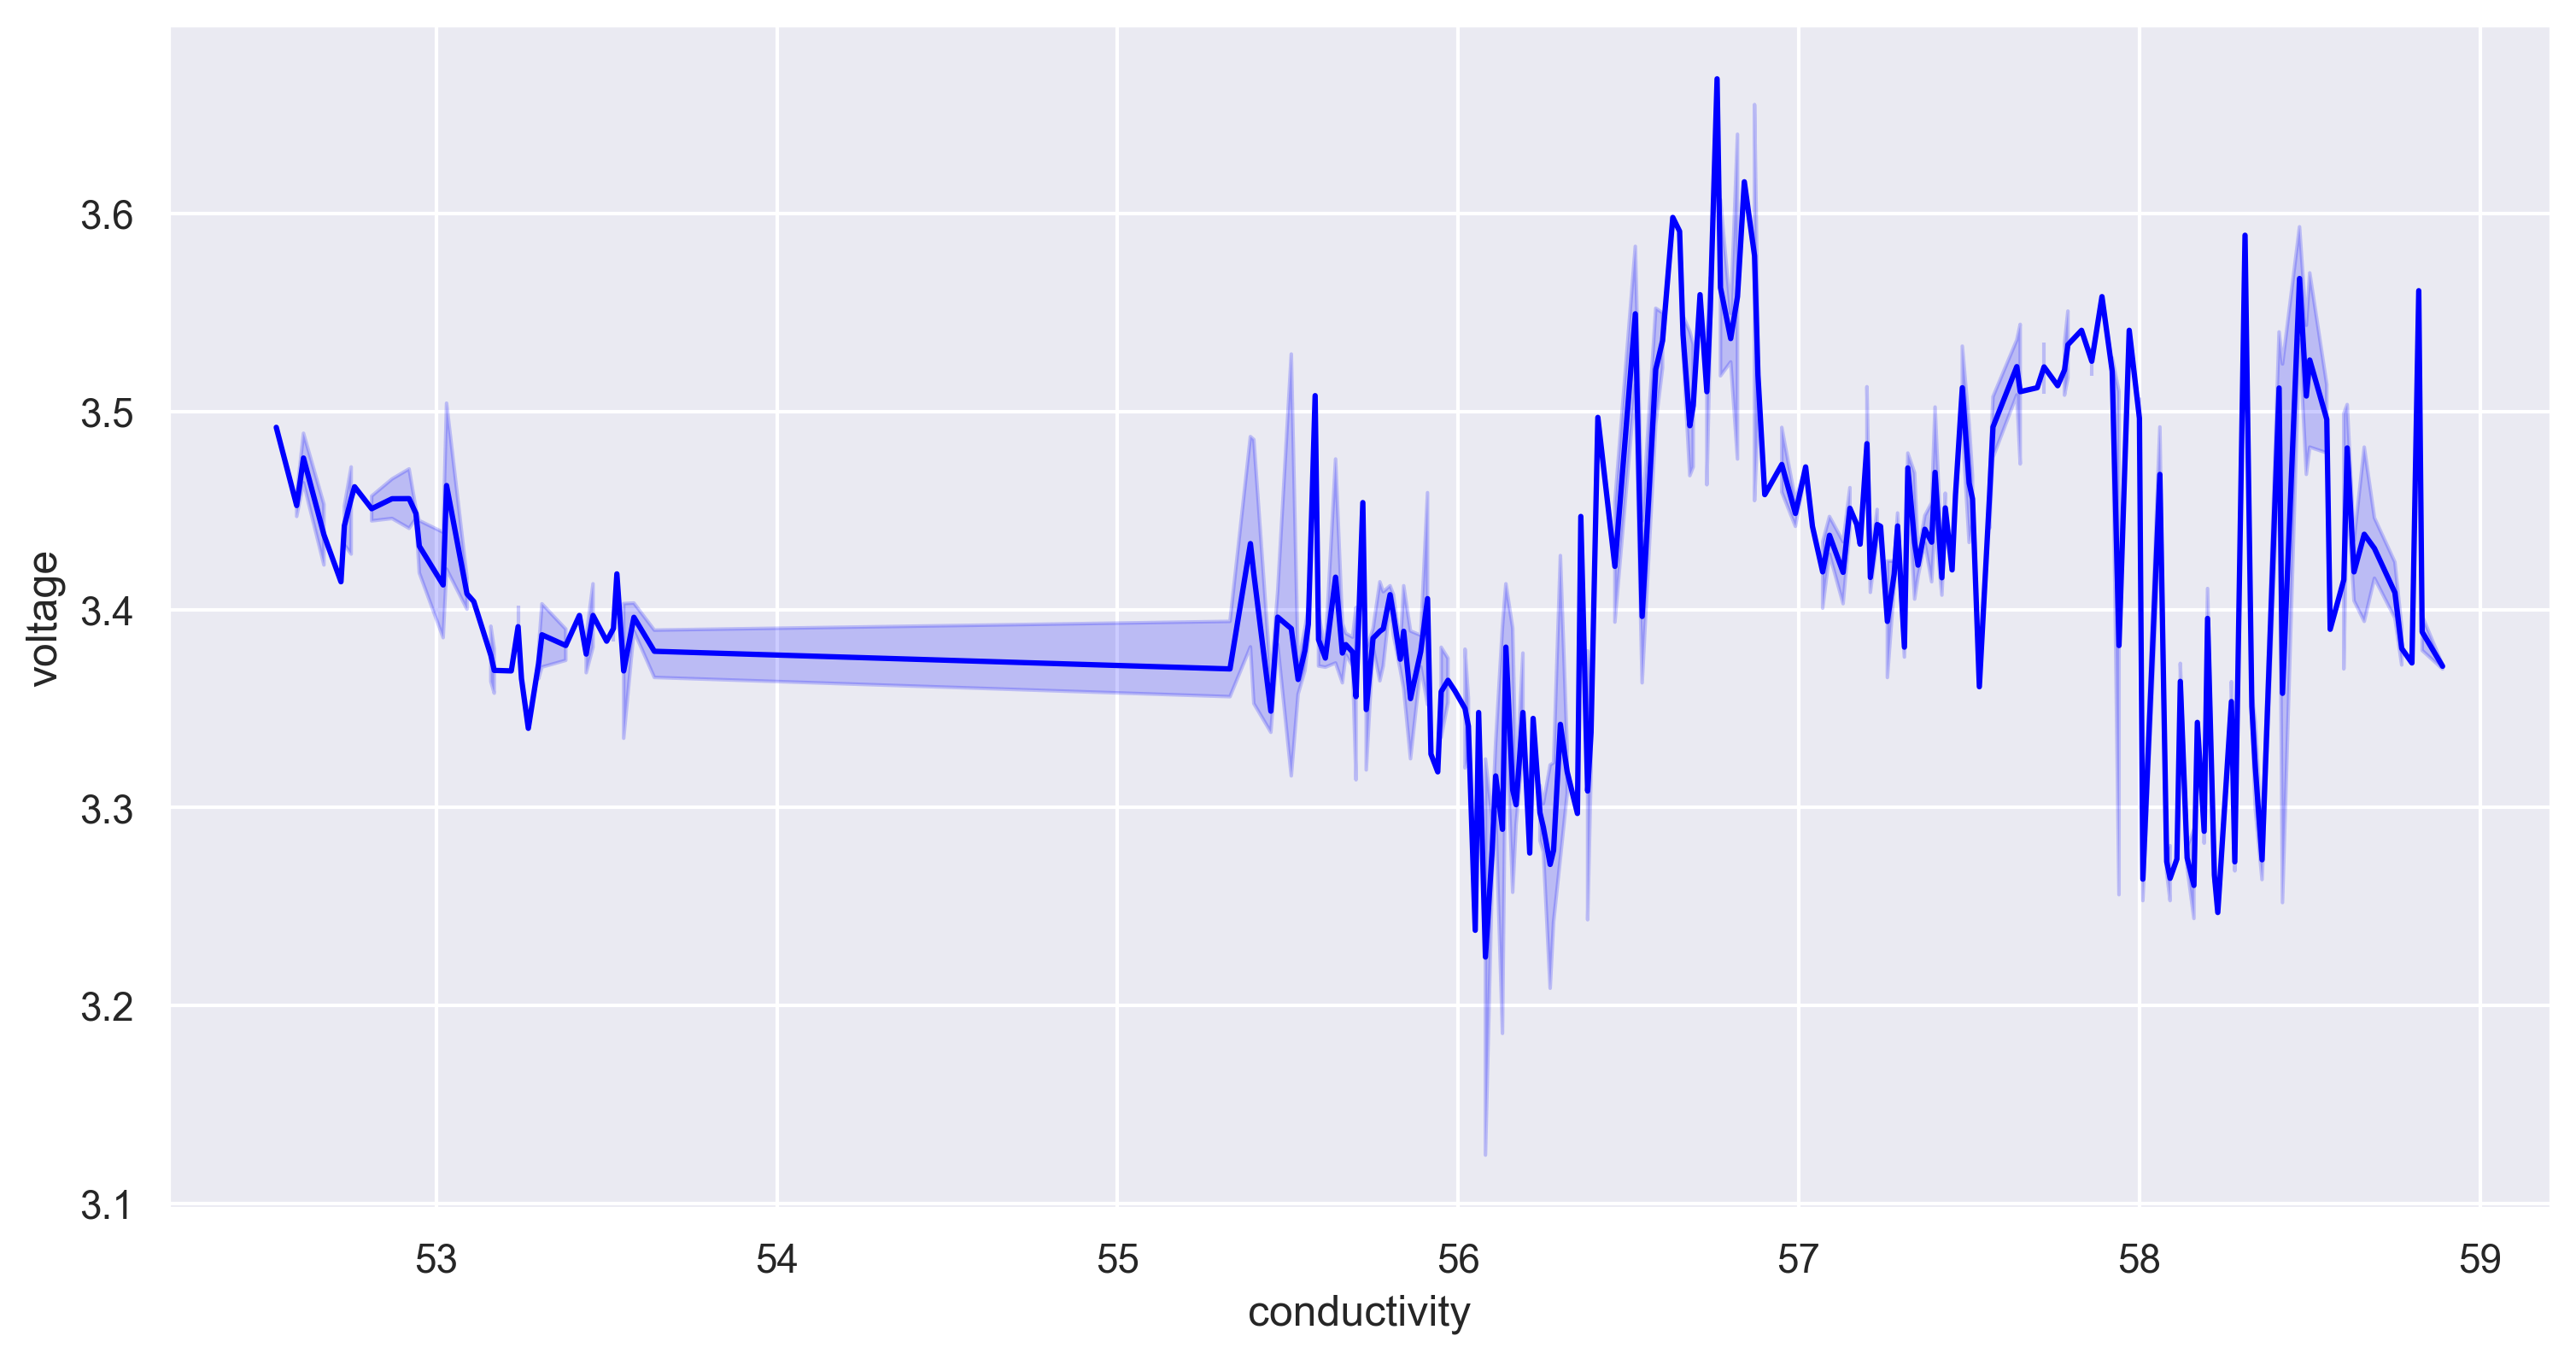

Plotting pH and temperature correlation over time.


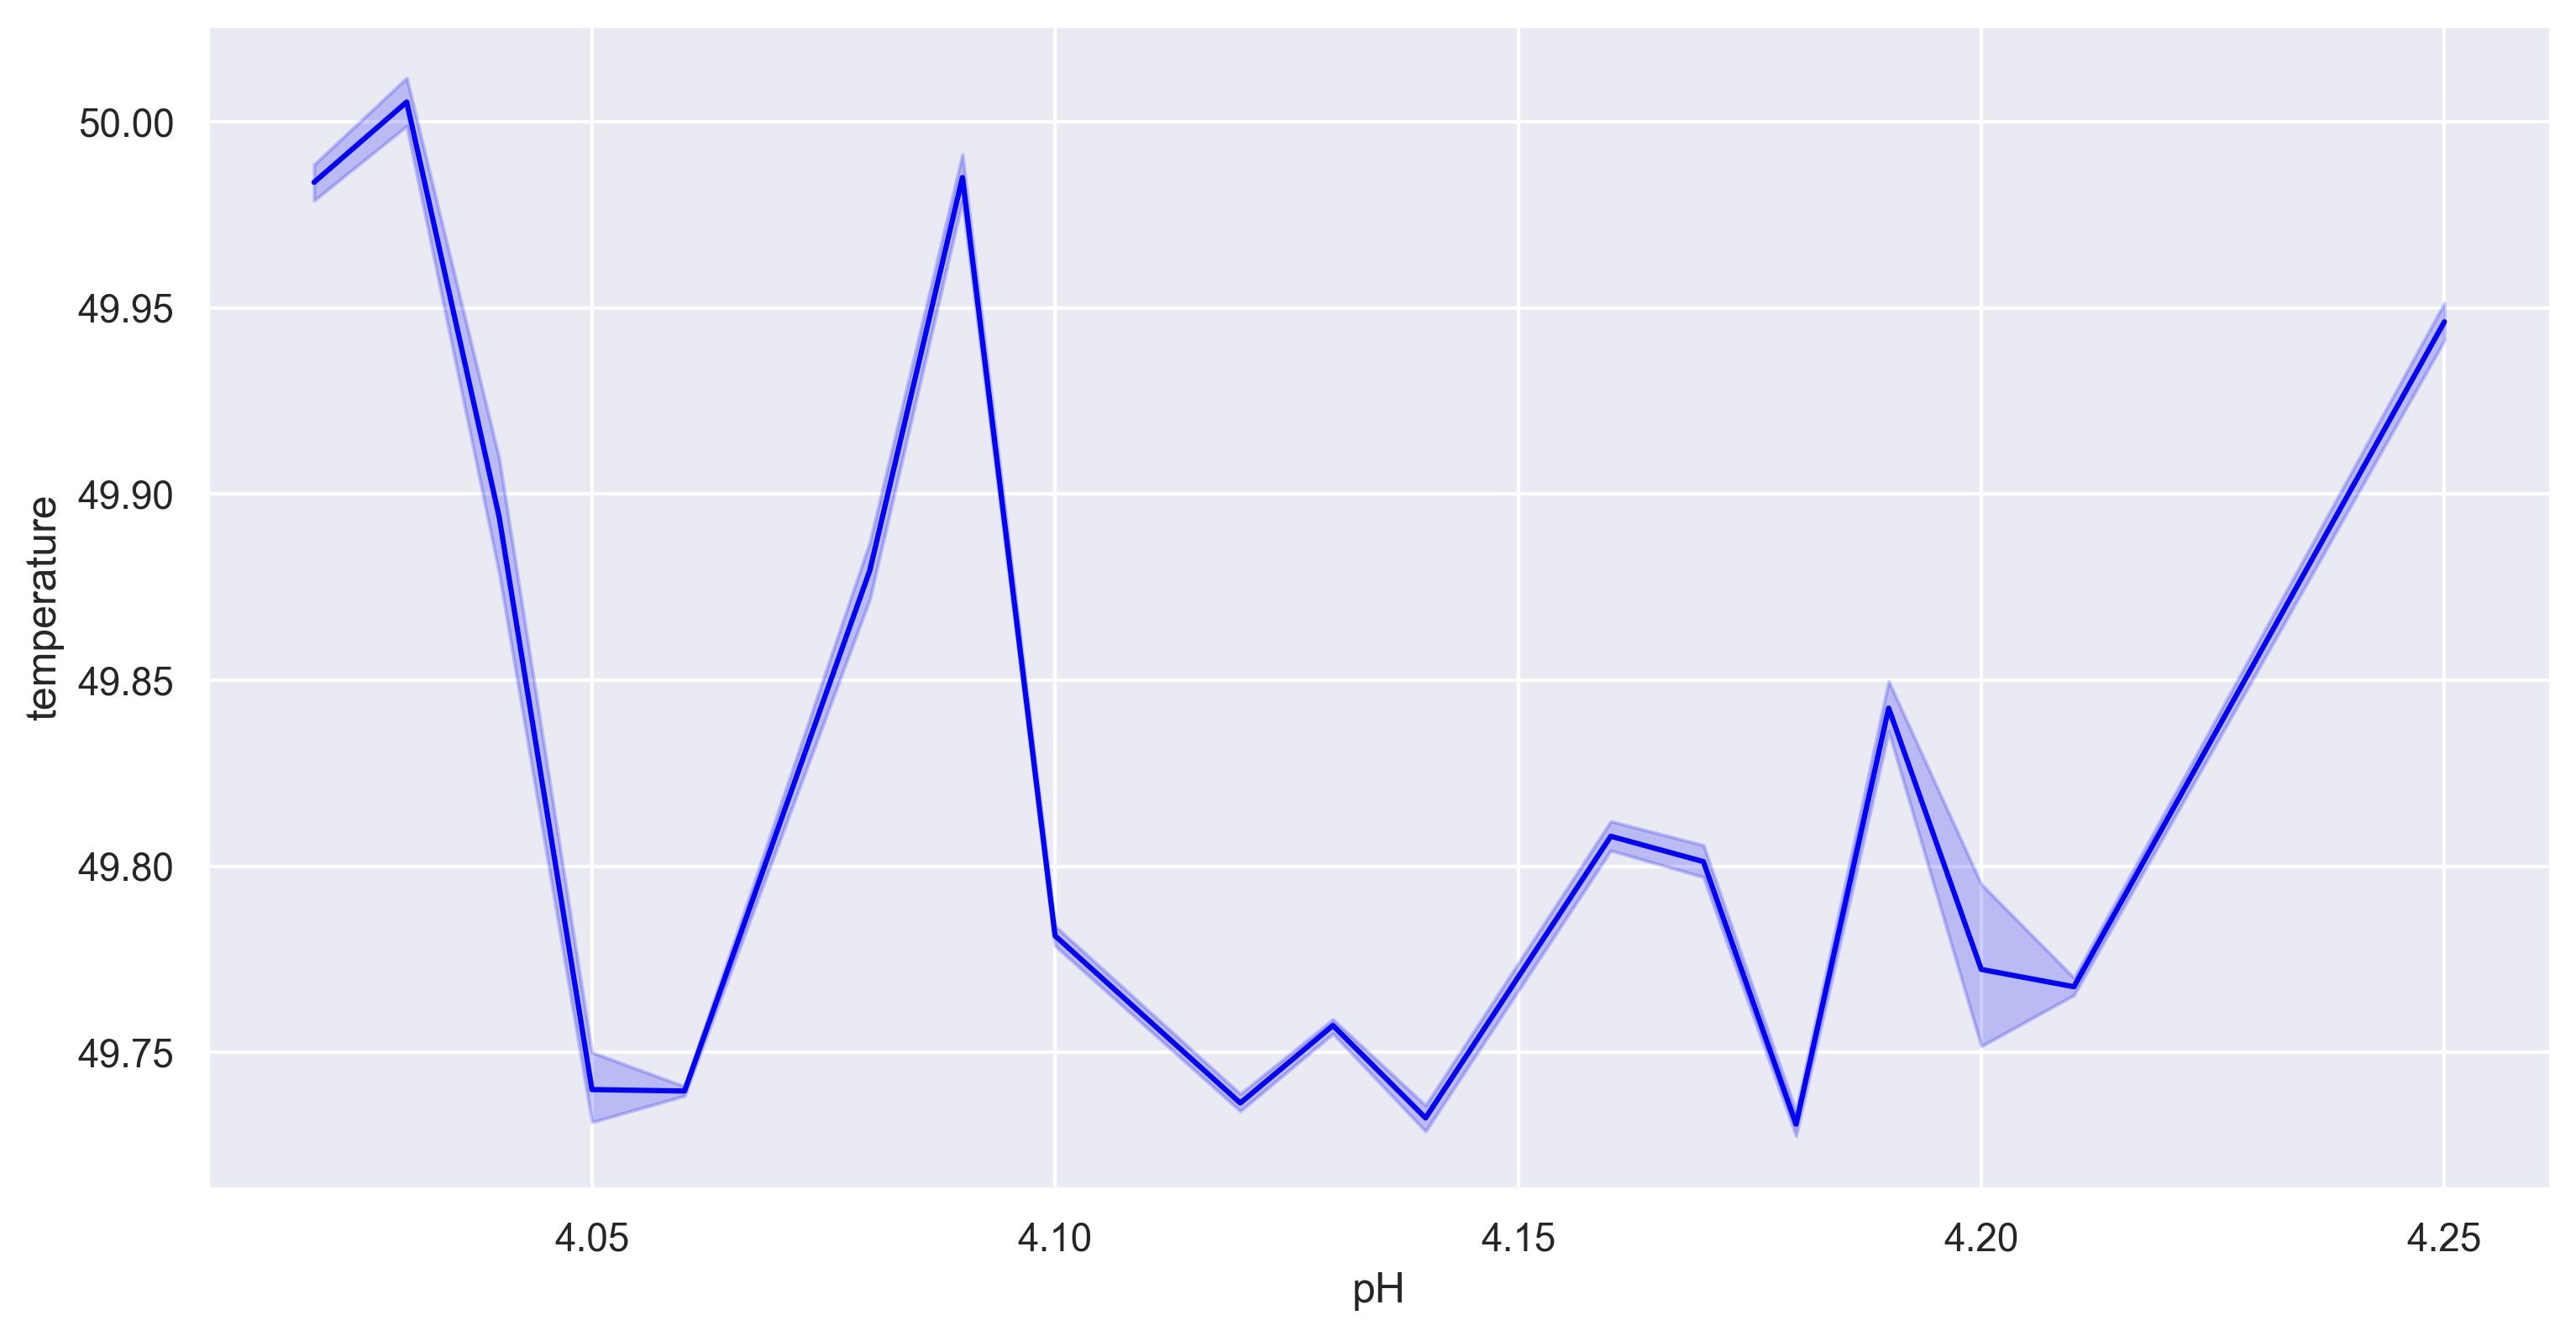

Plotting pH and voltage correlation over time.


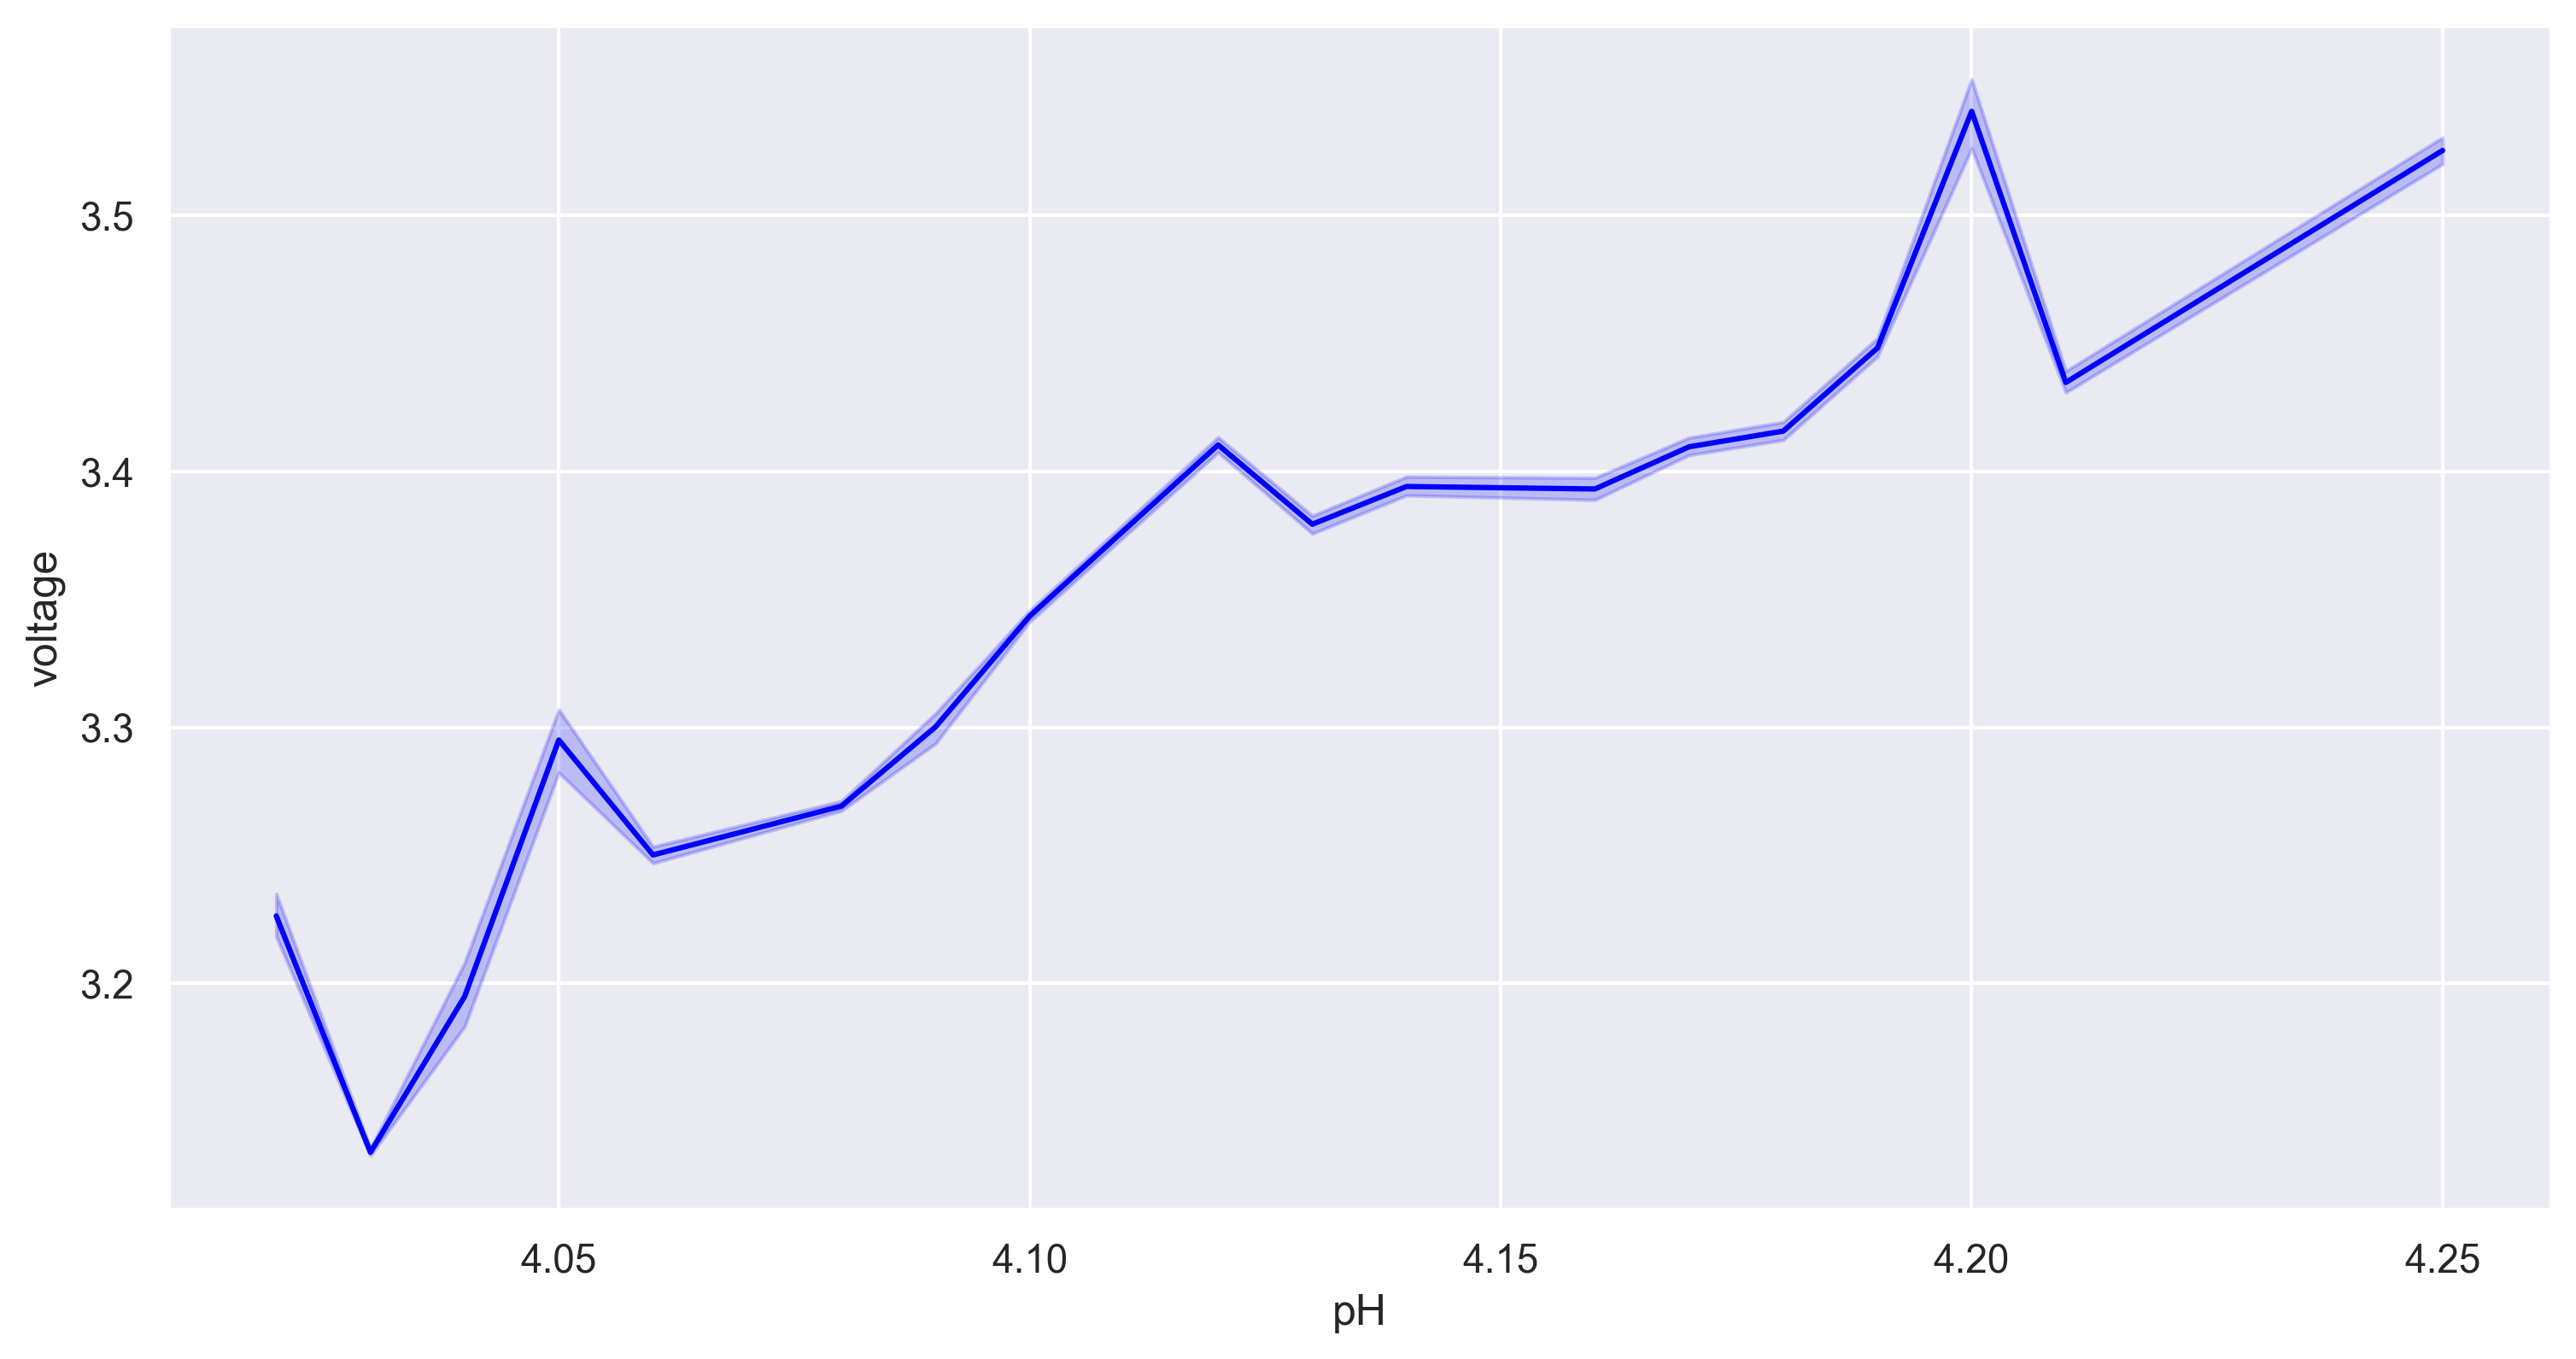

In [41]:
col = CC_df.columns.to_list()
print(col)
for param_1 in col:
    for param_2 in col:
        if param_1 != param_2:
            print(f'Plotting {param_1} and {param_2} correlation over time.')
            trial_df = CC_df[[param_1, param_2]].copy()
            
            mean_1 = trial_df[param_1].mean()
            mean_2 = trial_df[param_2].mean()
            dif = mean_1 - mean_2
            trial_df[f'{param_2}_offset'] = trial_df[param_2] + dif

            fig = plt.figure(figsize=(12, 6))
            fig = sns.lineplot(data=trial_df, x=param_1, y=param_2, color="blue")
            
            fig.grid(True)
            plt.show()
        else:
            continue
    col.remove(param_1)